In [1]:
import csv
import os
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
fname = '~/Dev/Drosophila_Inferelator/priors.tsv'

In [126]:
priors = pd.read_csv(fname, sep='\t')
priors = priors/2

In [127]:
priors.head()

FBgn0015239  FBgn0086680  FBgn0004396  FBgn0004652  FBgn0004394  \
FBgn0266820          0.0          1.0          0.0          0.0          0.0   
FBgn0014931          0.0          3.0          0.0          0.0          0.0   
FBgn0014930          0.0          2.0          0.0          0.0          0.0   
FBgn0264483          0.0          0.0          0.0          0.0          0.0   
FBgn0027562          0.0          0.0          0.0          0.0          2.0   

             FBgn0001147  FBgn0001148  FBgn0011723  FBgn0000576  FBgn0010433  \
FBgn0266820          0.0          0.0          0.0          1.0          0.0   
FBgn0014931          0.0          0.0          0.0          4.0          0.0   
FBgn0014930          0.0          0.0          1.0          4.0          2.0   
FBgn0264483          0.0          0.0          0.0          0.0          0.0   
FBgn0027562          0.0          1.0          0.0          1.0          0.0   

                ...       FBgn0038418  FBgn0001150  FBgn0026411  FBgn0000462  \
FBgn0266820     ...               1.0          0.0          0.0          0.0   
FBgn0014931     ...               0.0          0.0          6.0          1.0   
FBgn0014930     ...               0.0          0.0          6.0          0.0   
FBgn0264483     ...               0.0          0.0          0.0          0.0   
FBgn0027562     ...               0.0          0.0          0.0          1.0   

             FBgn0054031  FBgn0002922  FBgn0022935  FBgn0052830  FBgn0015561  \
FBgn0266820          0.0          0.0          0.0          0.0          0.0   
FBgn0014931          4.0          1.0          2.0          2.0          4.0   
FBgn0014930          4.0          1.0          0.0          2.0          4.0   
FBgn0264483          0.0          0.0          0.0          2.0          0.0   
FBgn0027562          4.0          0.0          0.0          0.0          0.0   

             FBgn0000546  
FBgn0266820          1.0  
FBgn0014931          1.0  
FBgn0014930          0.0  
FBgn0264483          0.0  
FBgn0027562          0.0  

[5 rows x 323 columns]

In [28]:
priors.shape

(17302, 323)

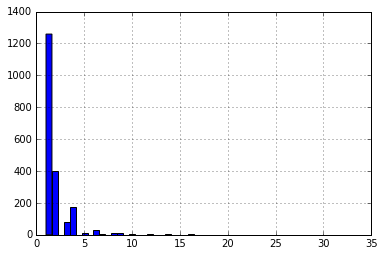

In [29]:
priors['FBgn0015239'][priors['FBgn0015239'] > 0].hist(bins=50)

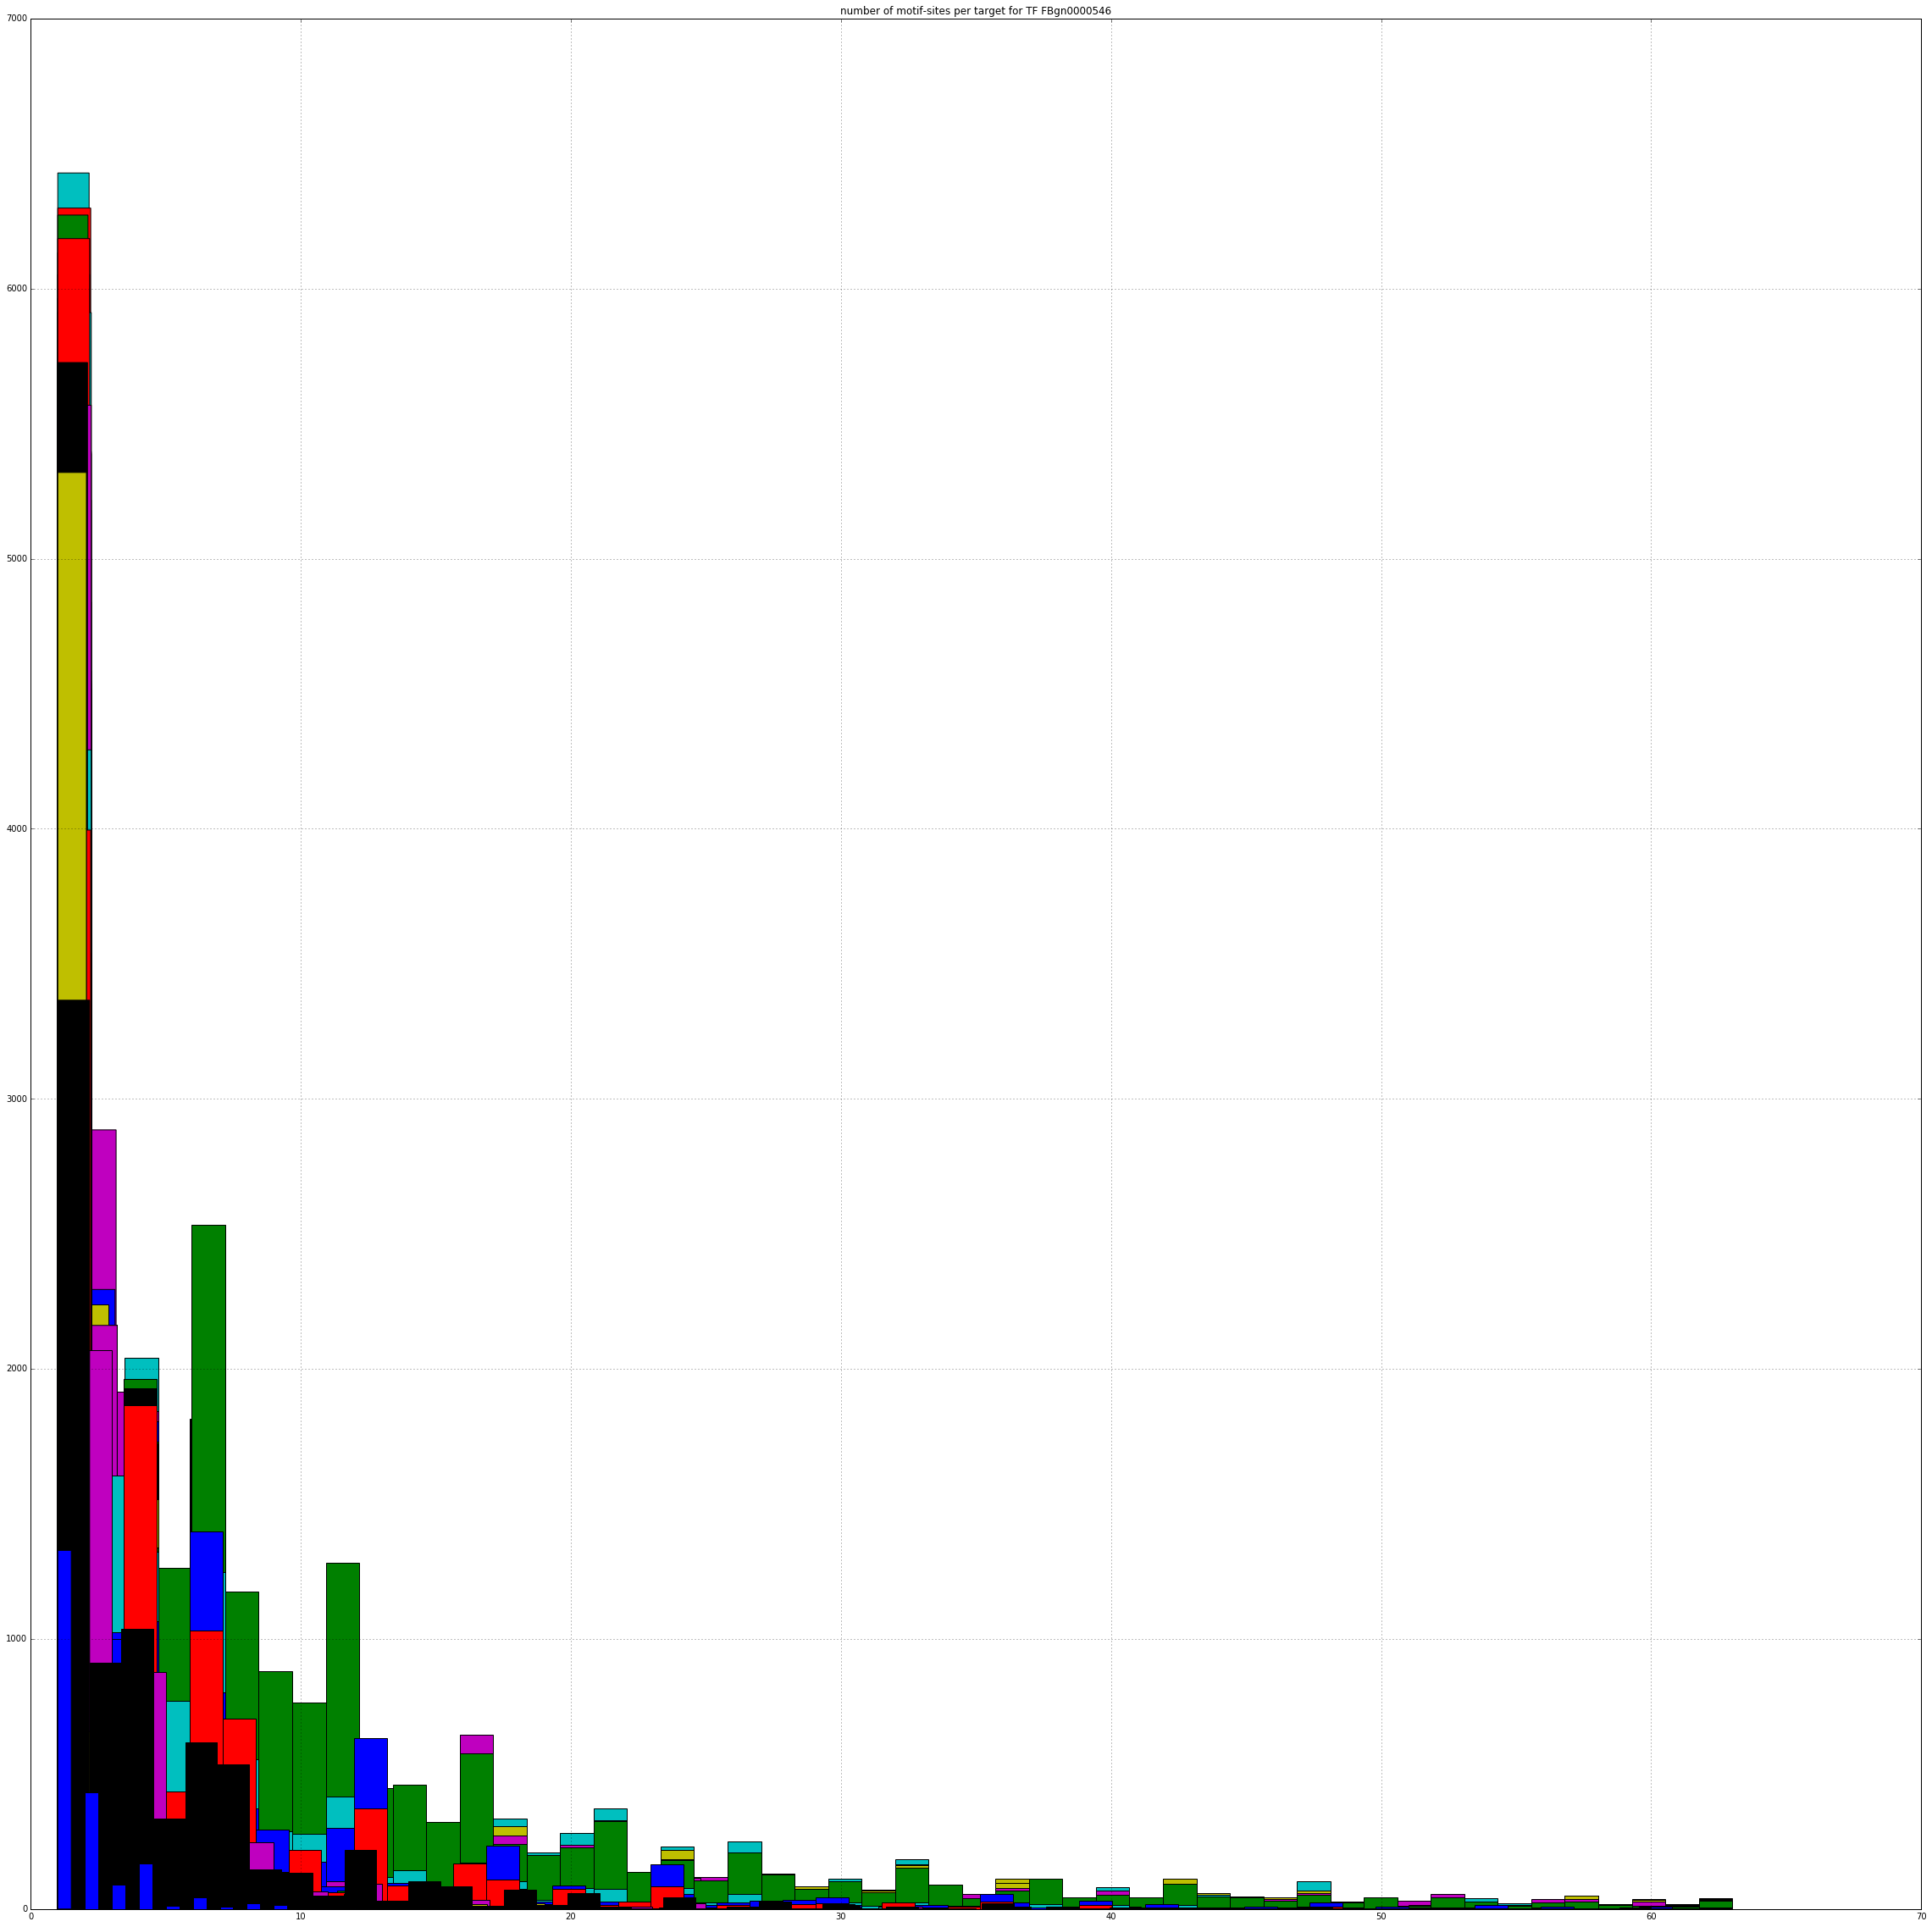

In [30]:
medians = {}
plt.figure(figsize=(40,40))
for tf in priors.columns:
    nonzero_dat = priors[tf][priors[tf] > 0]
    medians[tf] = nonzero_dat.median()
    plt.title('number of motif-sites per target for TF {}'.format(tf))
    nonzero_dat.hist(bins=50)
    

In [32]:
plt.hist(medians.values(), bins=30)

(array([ 122.,    0.,    0.,  130.,    0.,    0.,    0.,   26.,    0.,
           0.,    0.,   30.,    0.,    0.,    0.,    6.,    0.,    0.,
           3.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,    4.,
           0.,    0.,    1.]),
 array([ 1.        ,  1.26666667,  1.53333333,  1.8       ,  2.06666667,
         2.33333333,  2.6       ,  2.86666667,  3.13333333,  3.4       ,
         3.66666667,  3.93333333,  4.2       ,  4.46666667,  4.73333333,
         5.        ,  5.26666667,  5.53333333,  5.8       ,  6.06666667,
         6.33333333,  6.6       ,  6.86666667,  7.13333333,  7.4       ,
         7.66666667,  7.93333333,  8.2       ,  8.46666667,  8.73333333,  9.        ]),
 <a list of 30 Patch objects>)

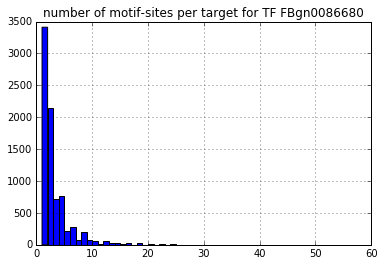

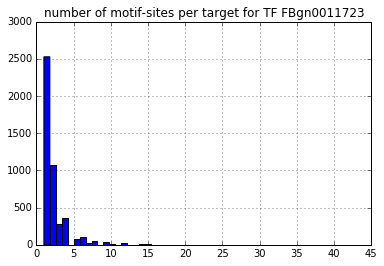

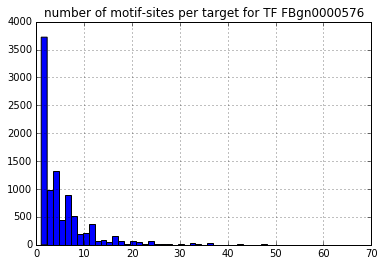

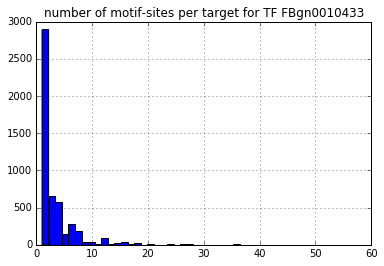

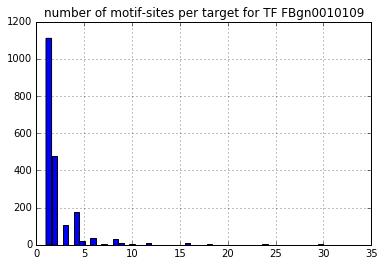

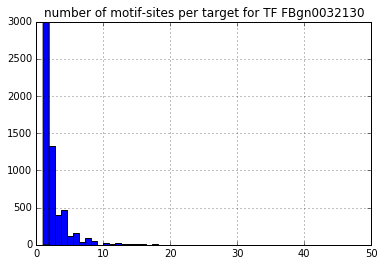

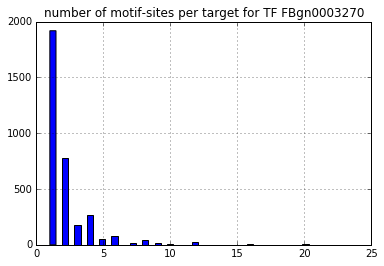

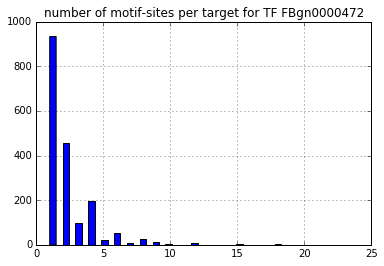

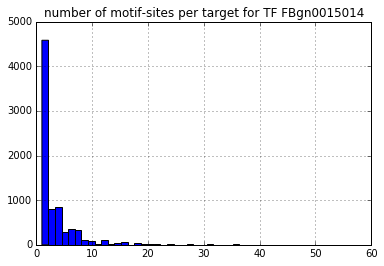

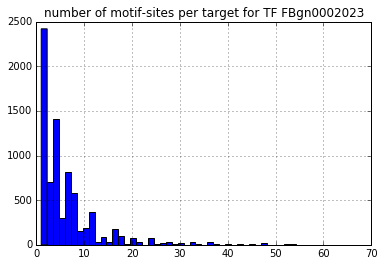

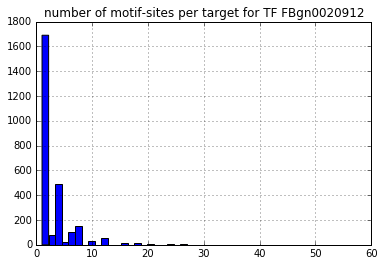

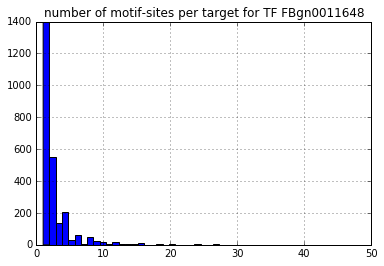

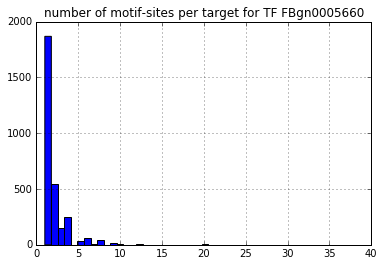

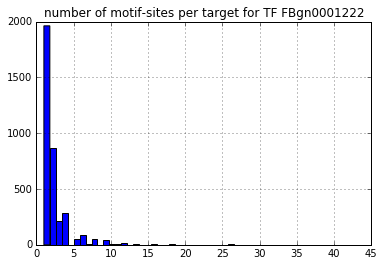

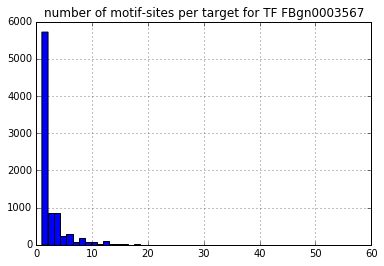

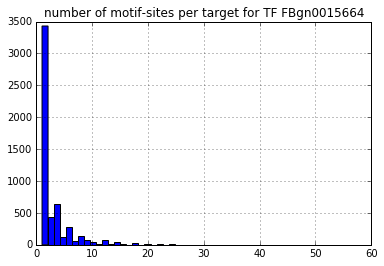

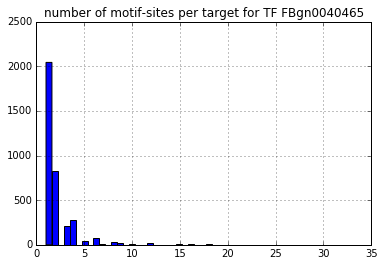

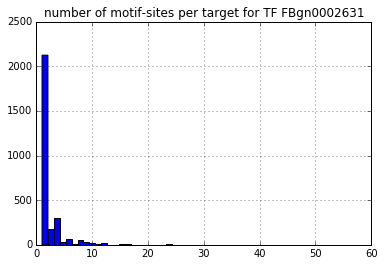

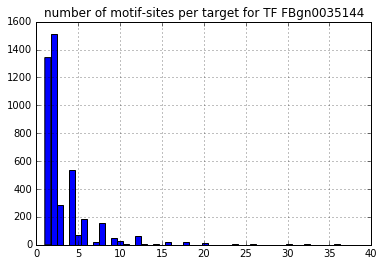

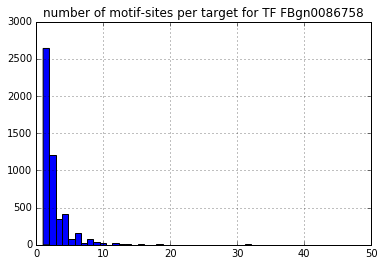

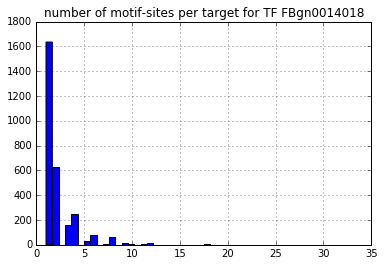

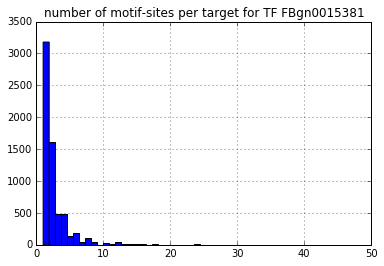

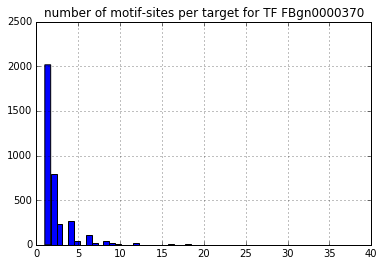

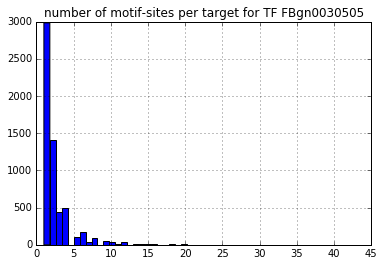

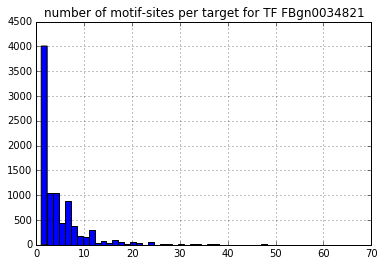

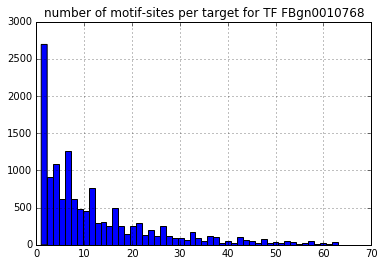

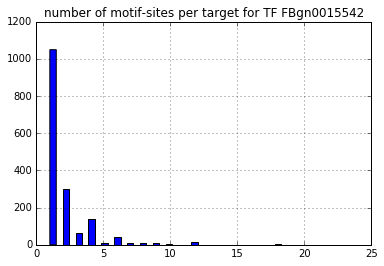

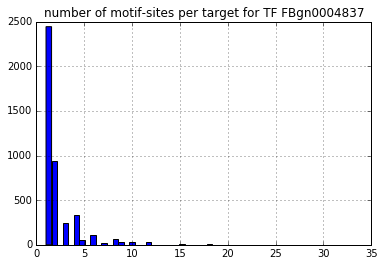

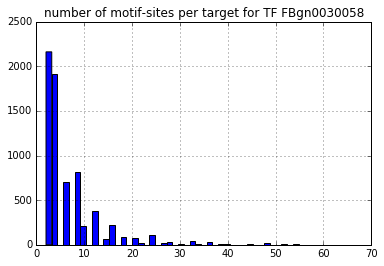

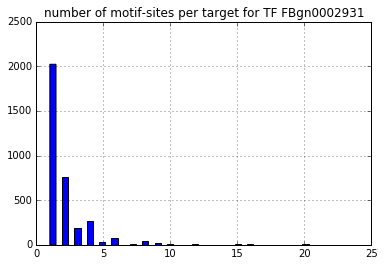

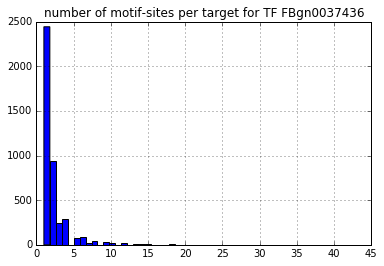

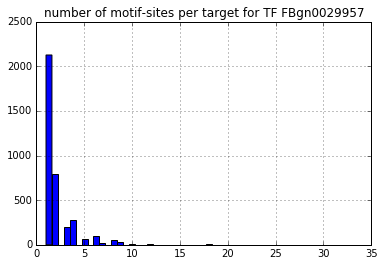

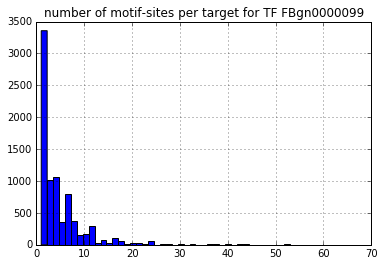

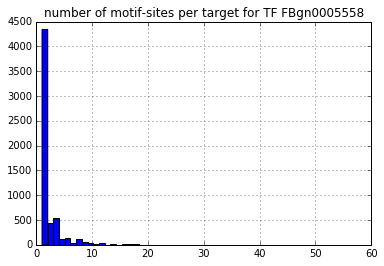

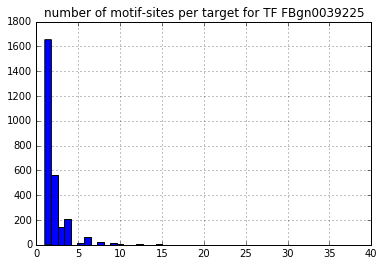

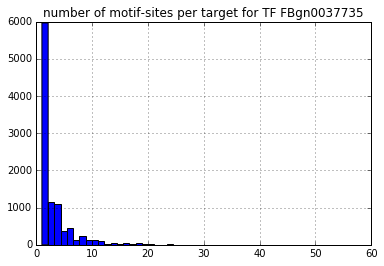

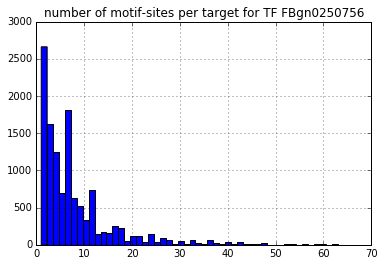

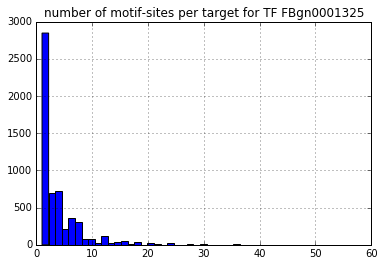

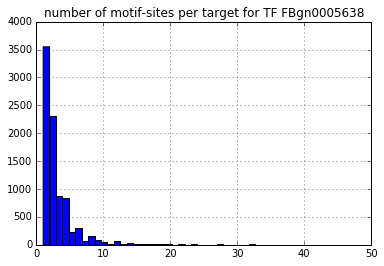

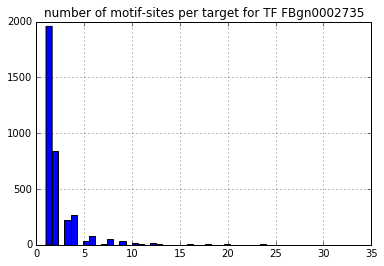

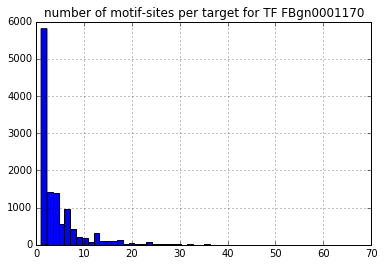

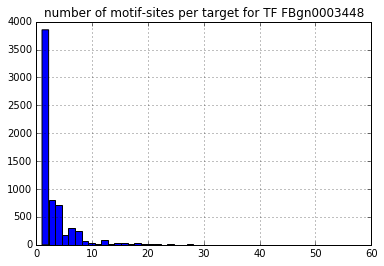

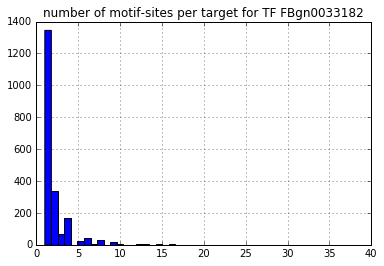

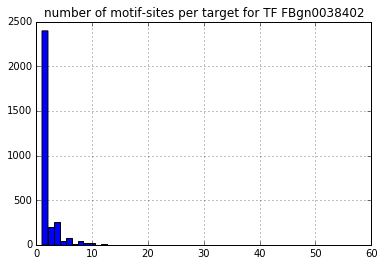

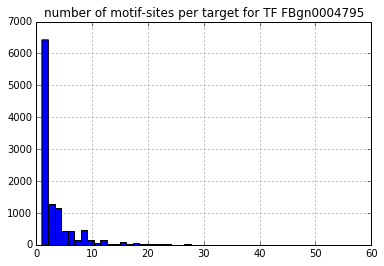

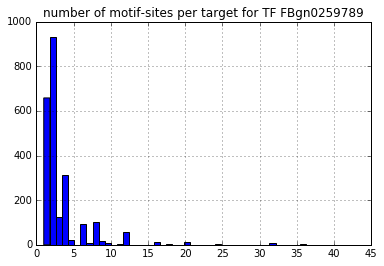

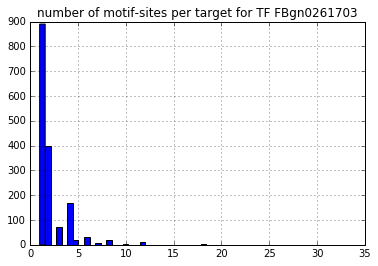

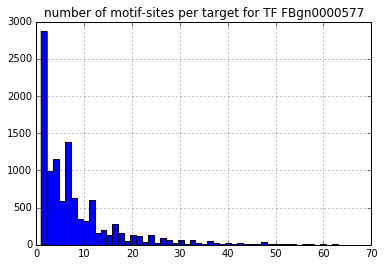

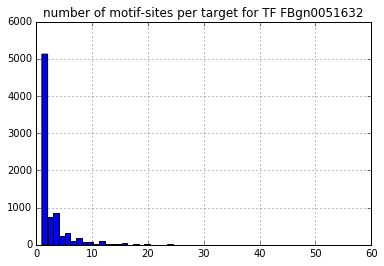

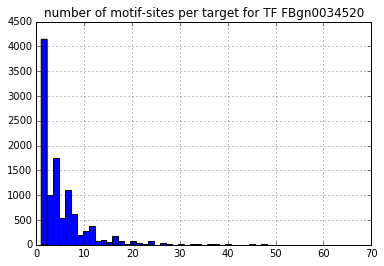

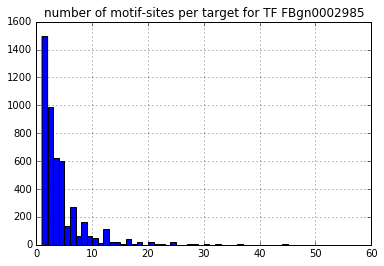

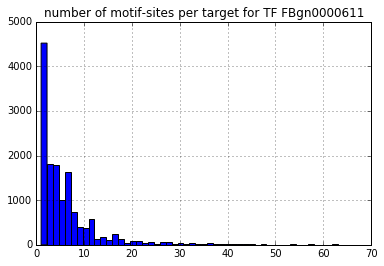

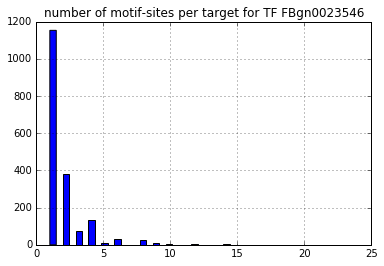

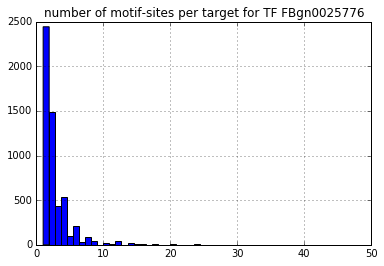

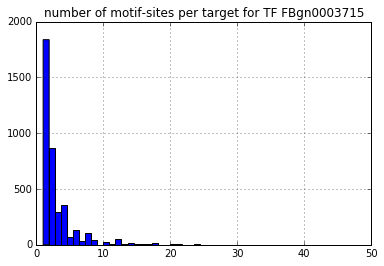

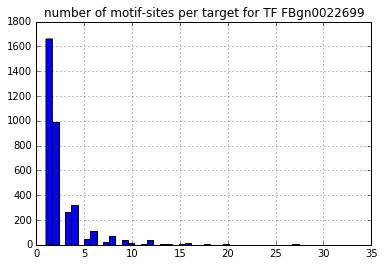

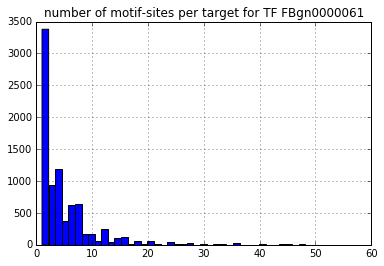

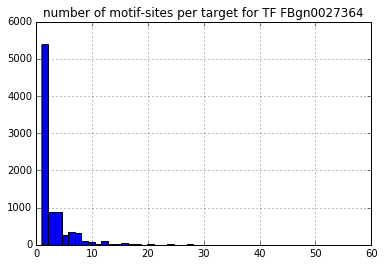

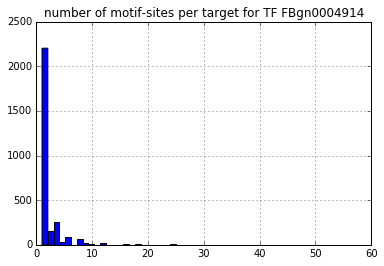

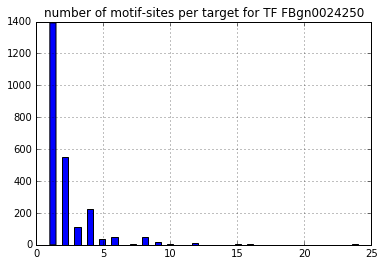

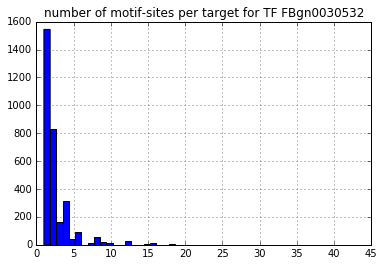

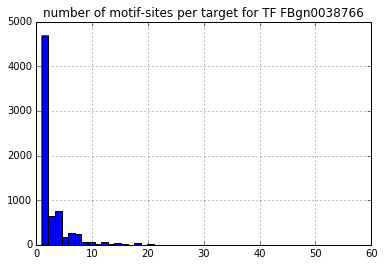

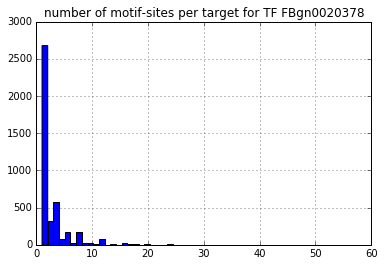

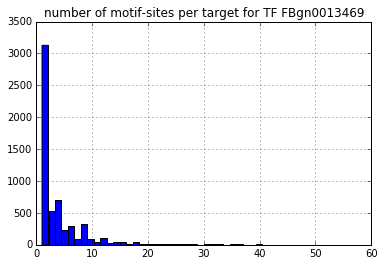

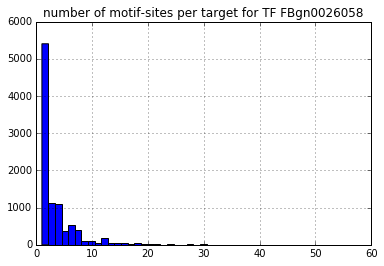

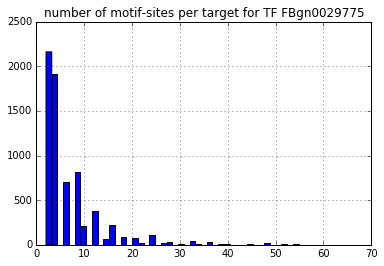

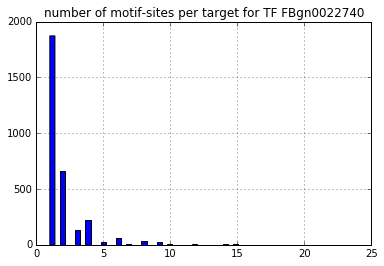

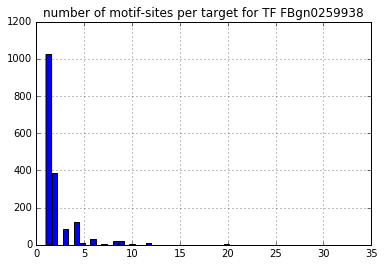

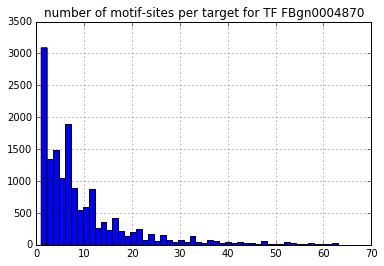

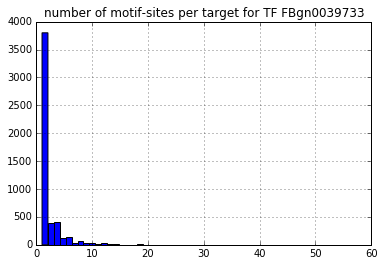

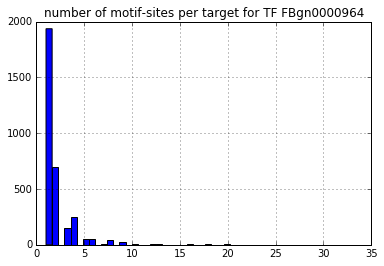

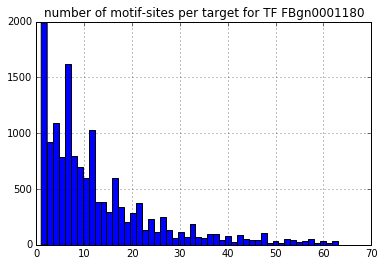

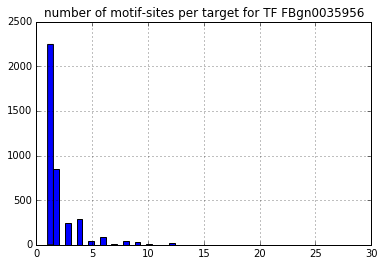

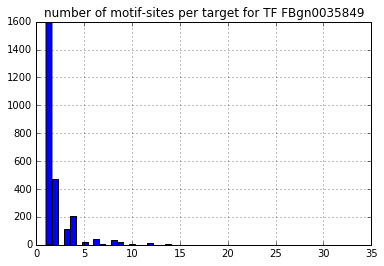

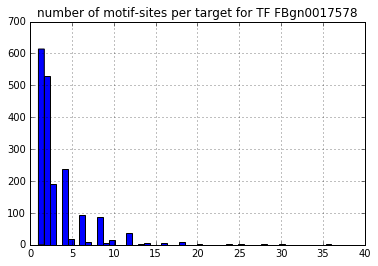

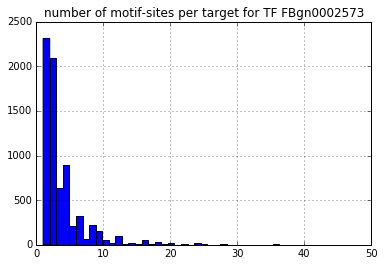

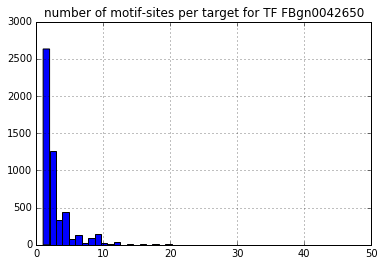

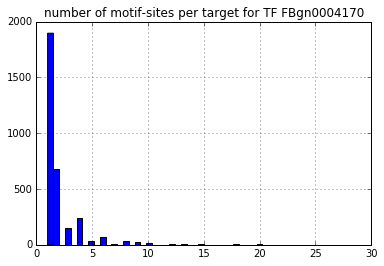

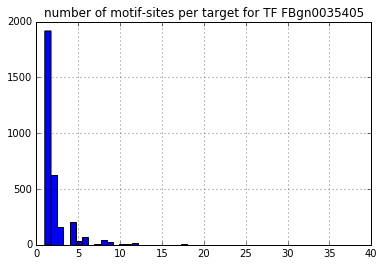

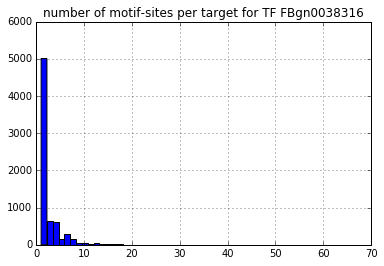

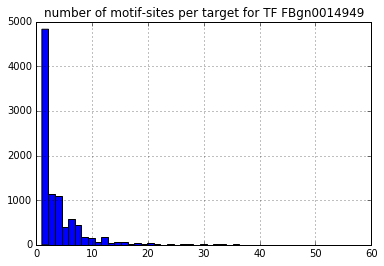

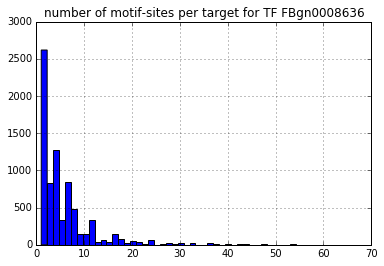

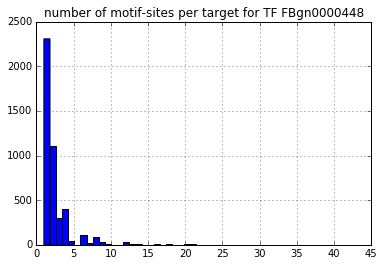

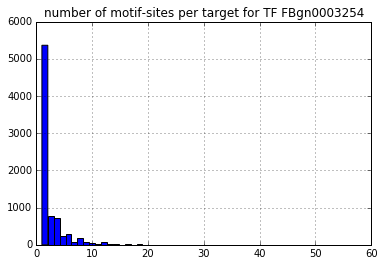

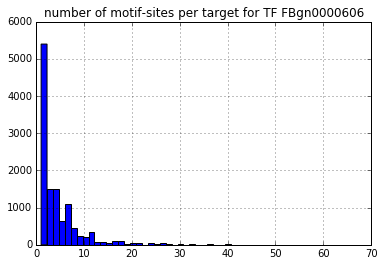

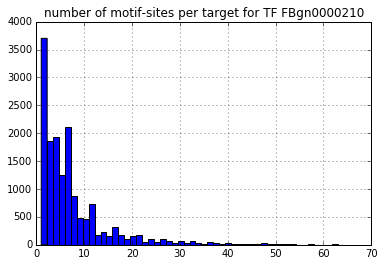

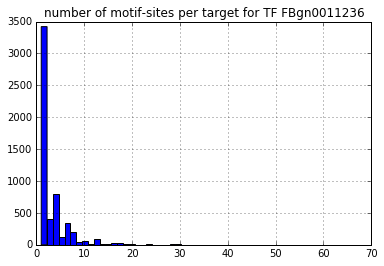

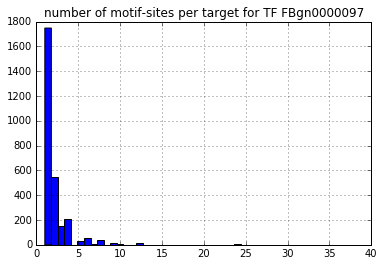

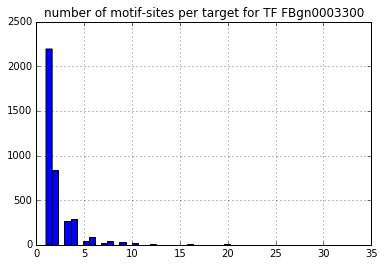

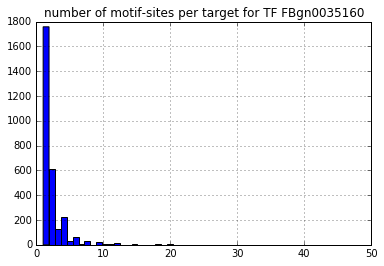

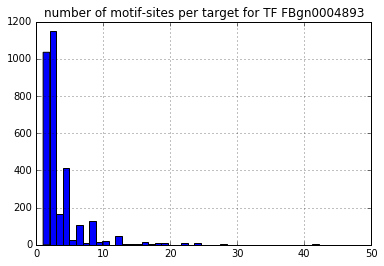

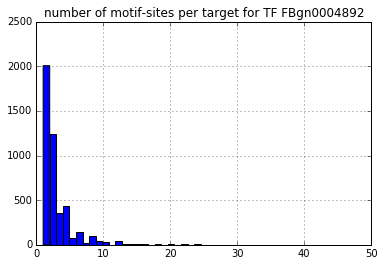

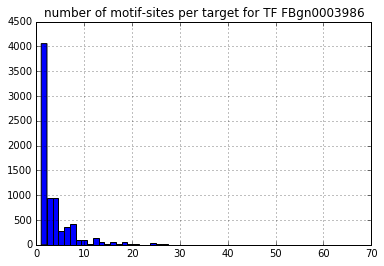

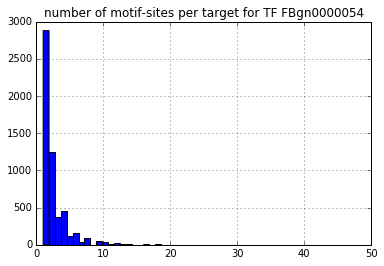

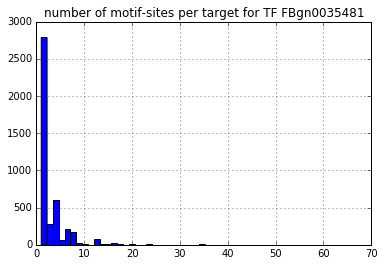

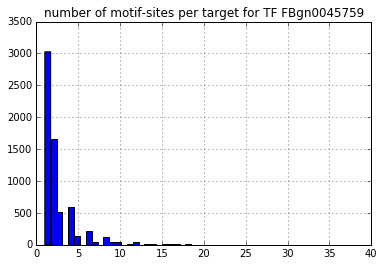

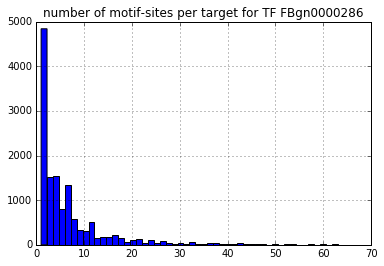

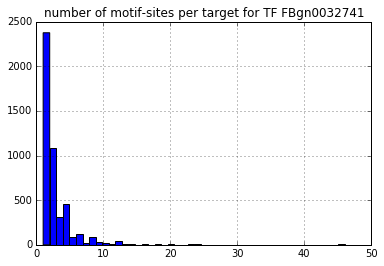

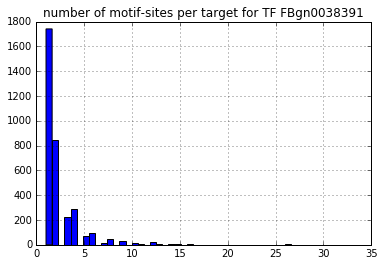

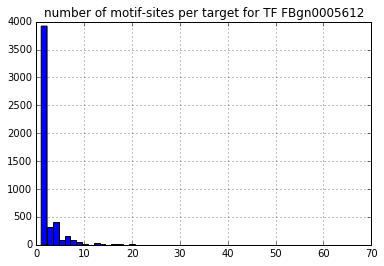

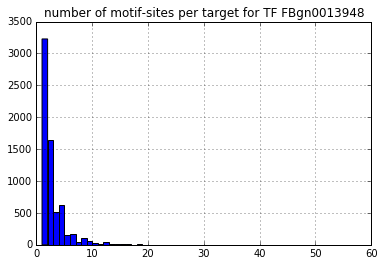

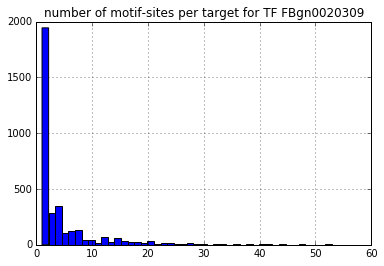

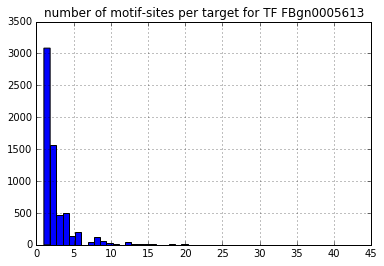

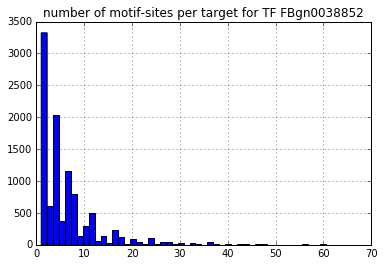

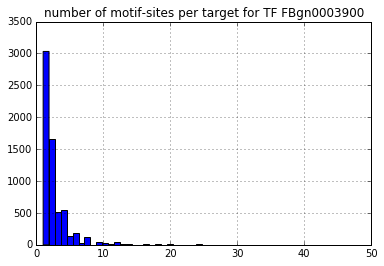

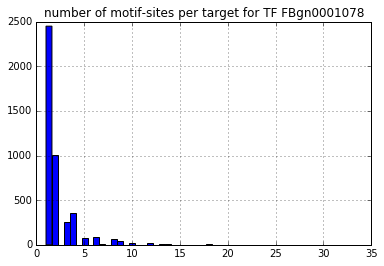

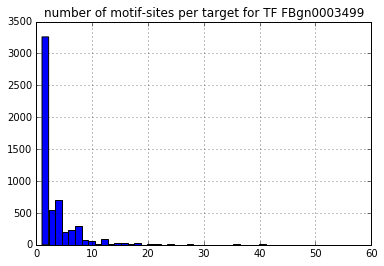

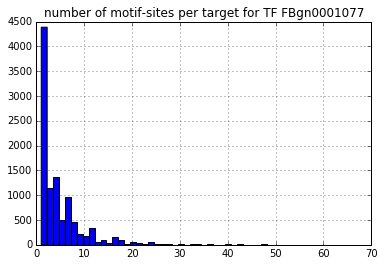

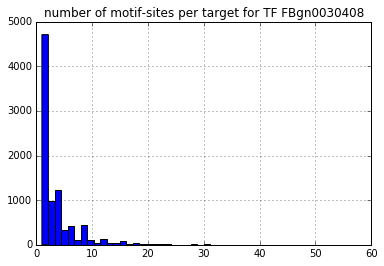

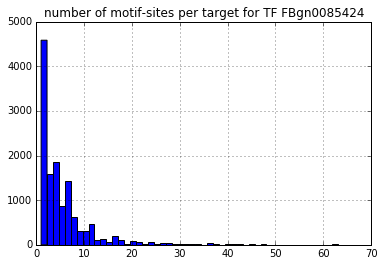

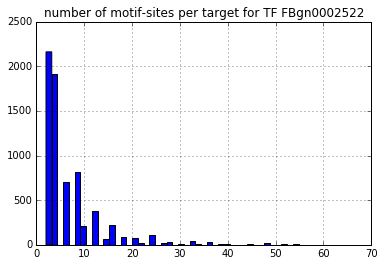

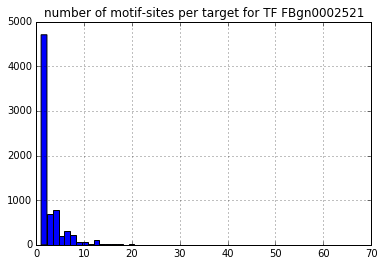

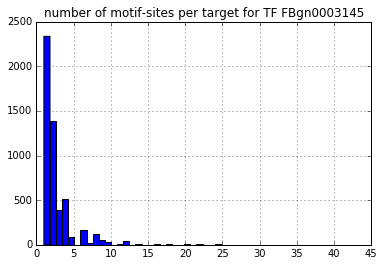

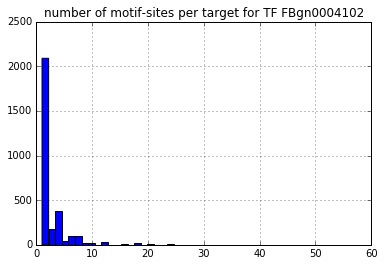

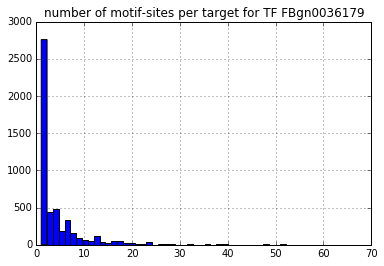

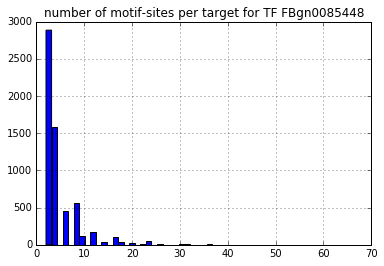

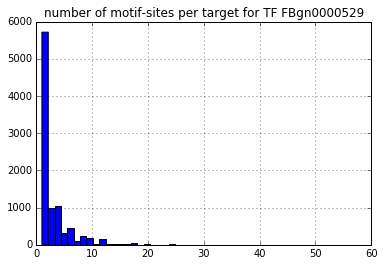

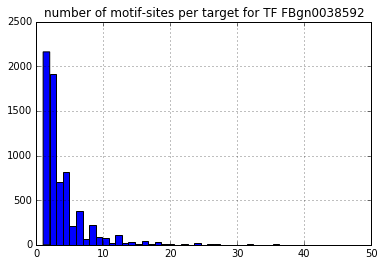

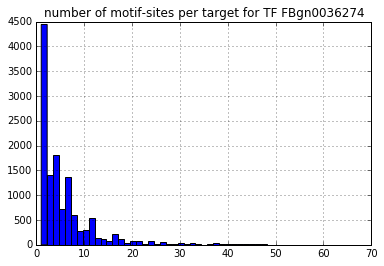

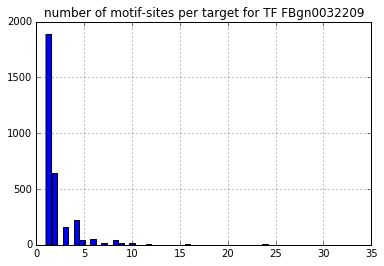

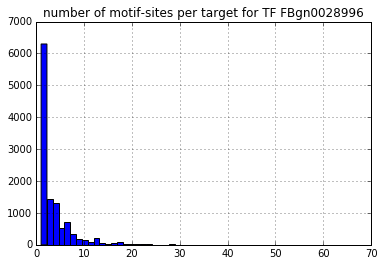

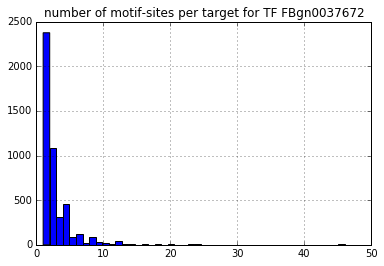

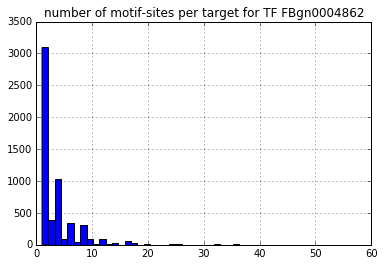

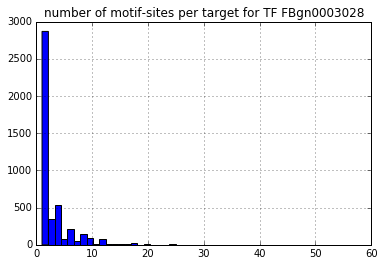

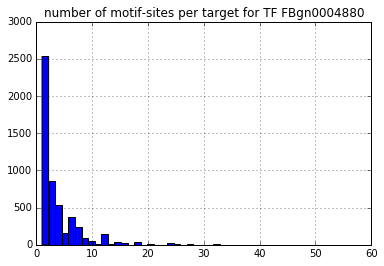

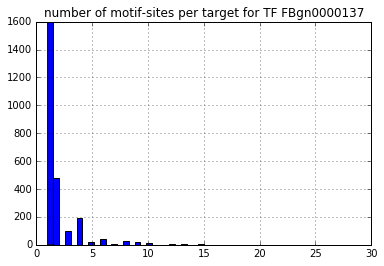

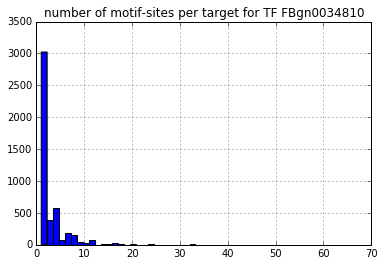

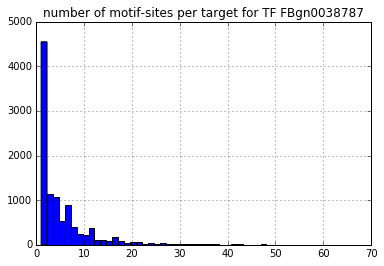

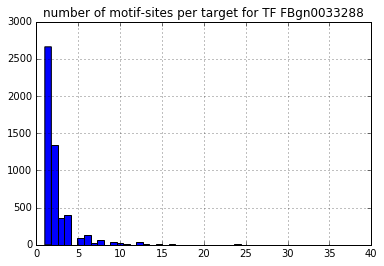

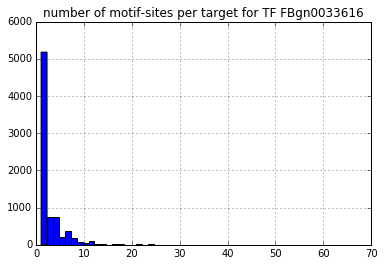

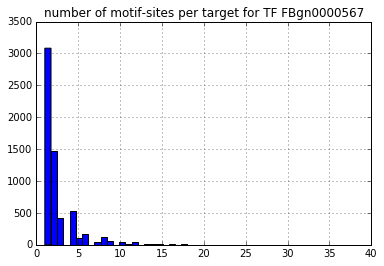

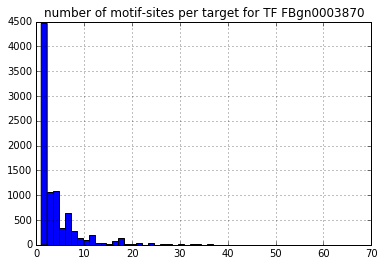

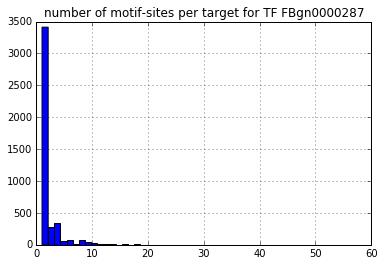

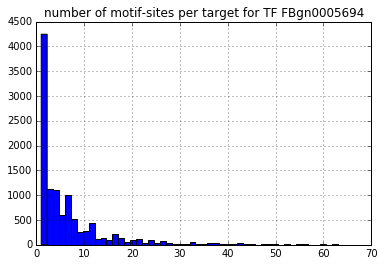

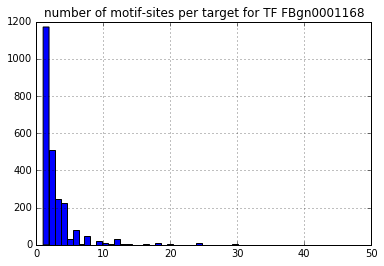

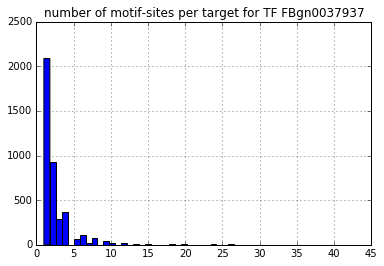

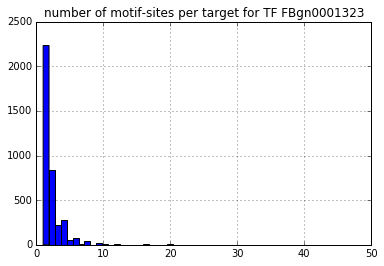

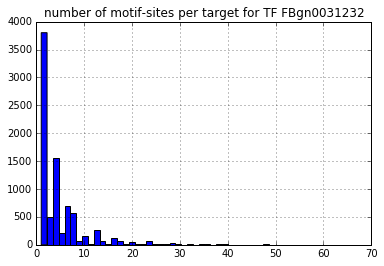

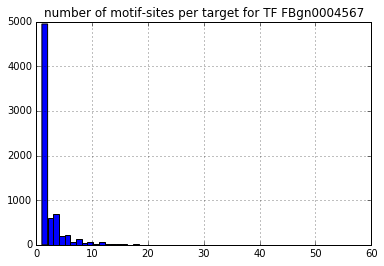

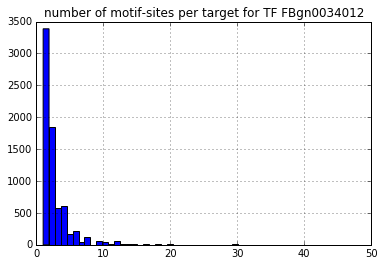

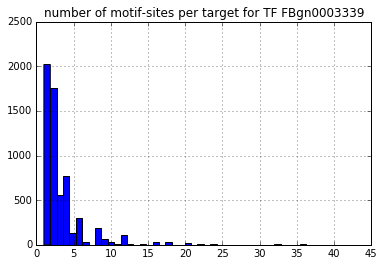

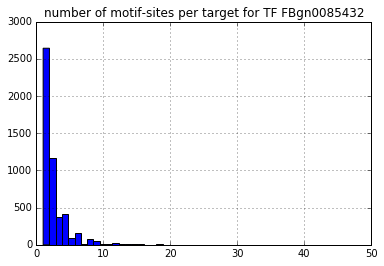

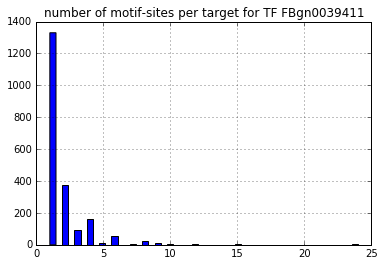

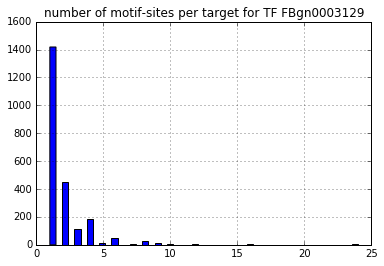

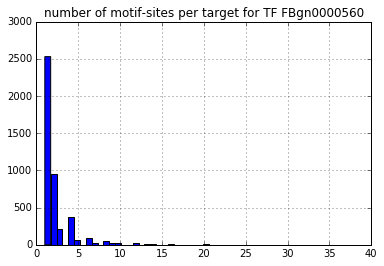

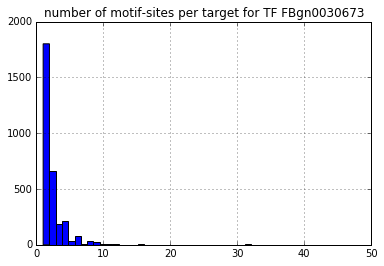

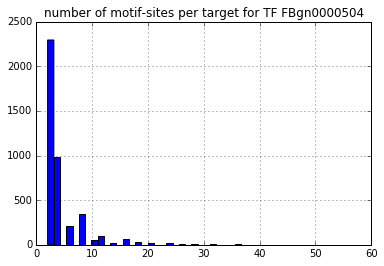

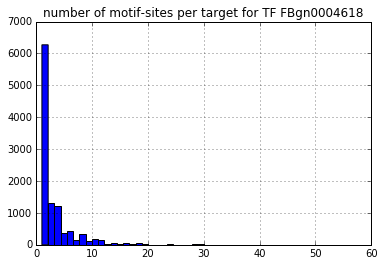

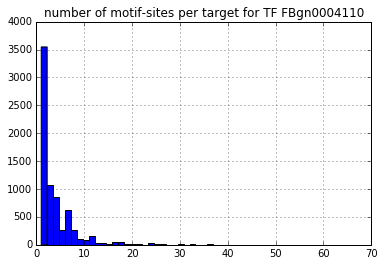

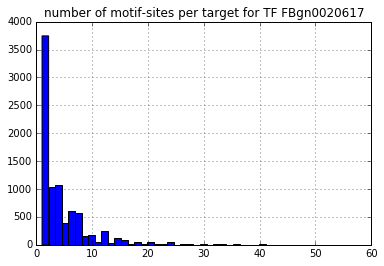

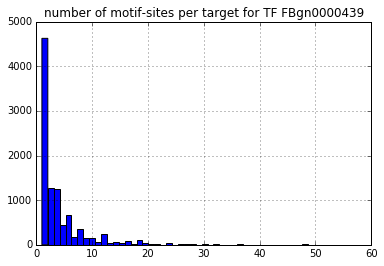

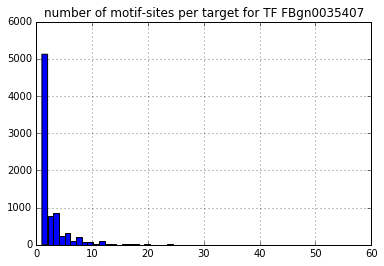

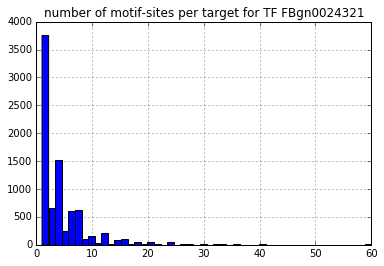

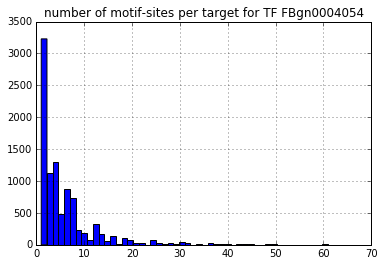

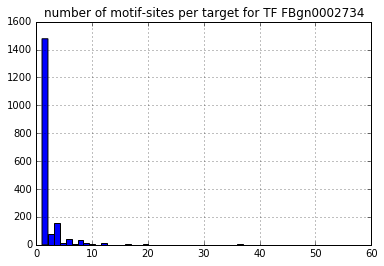

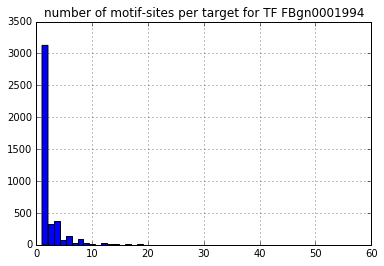

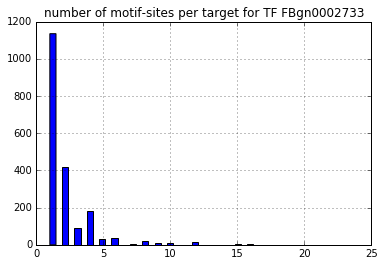

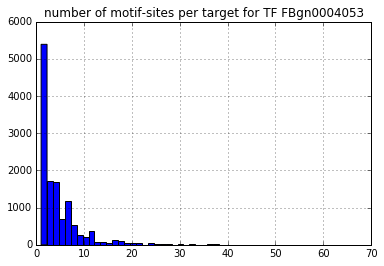

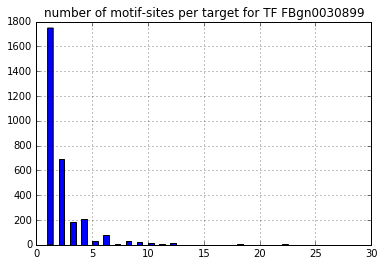

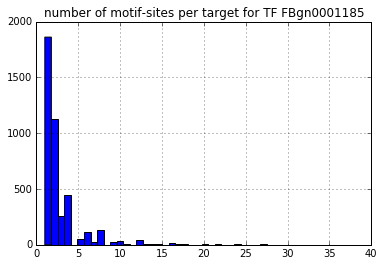

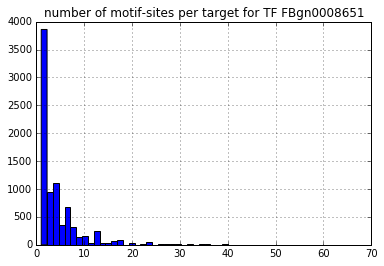

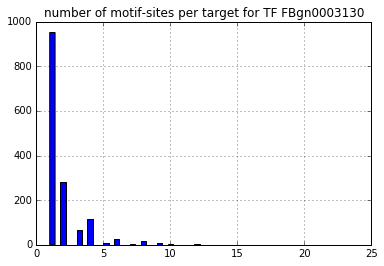

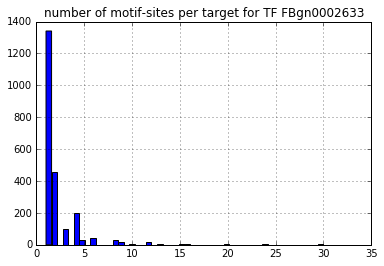

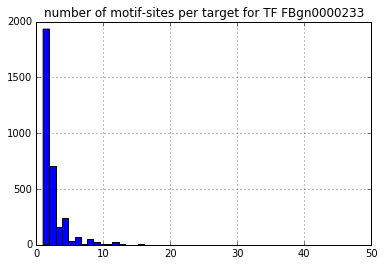

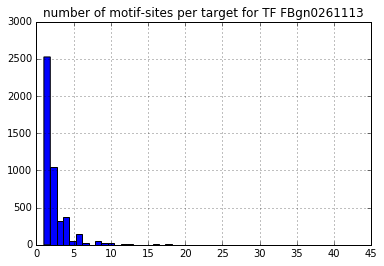

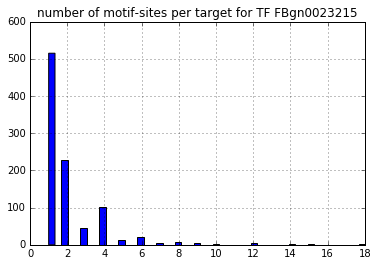

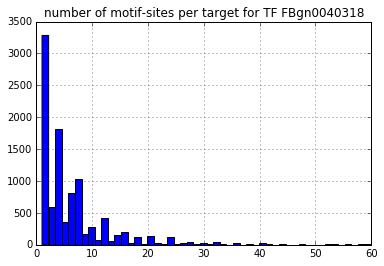

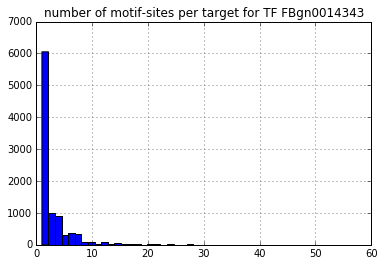

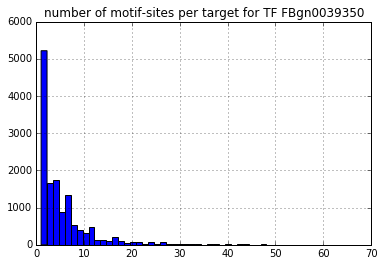

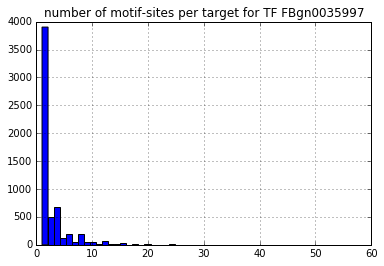

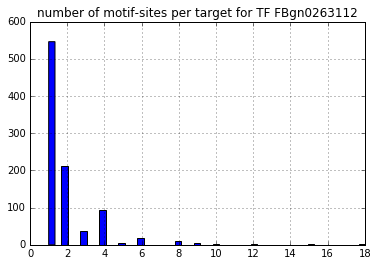

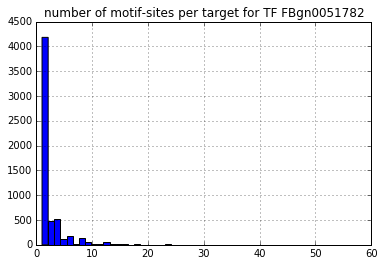

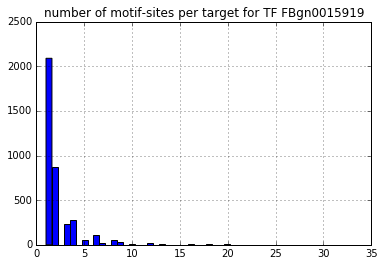

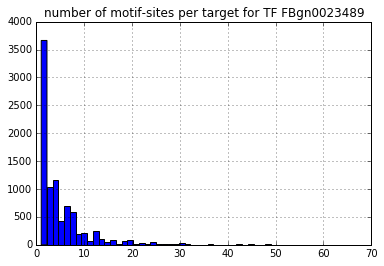

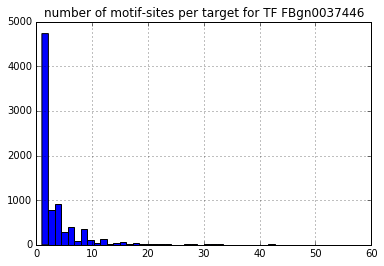

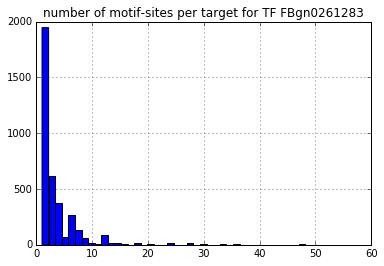

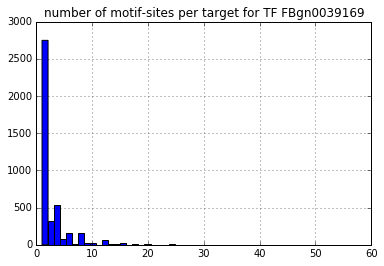

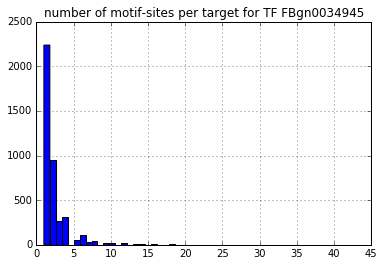

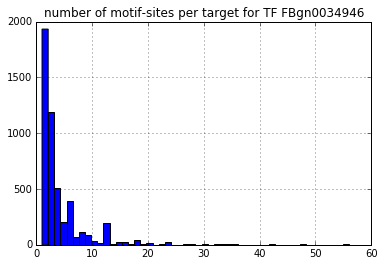

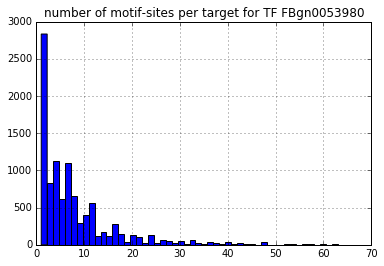

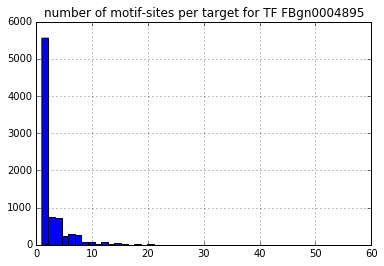

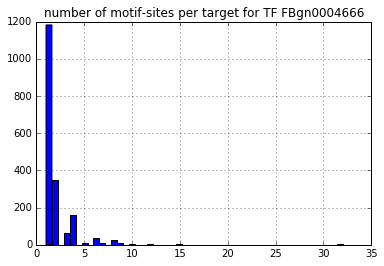

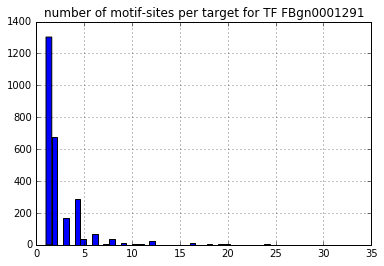

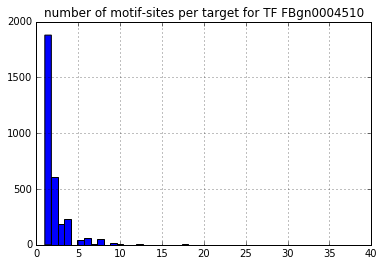

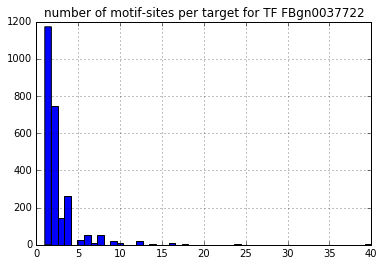

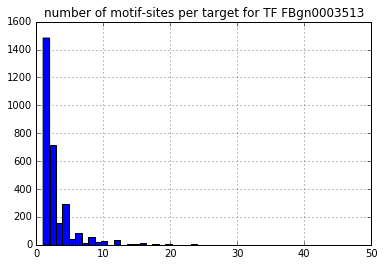

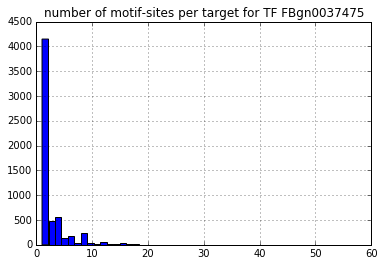

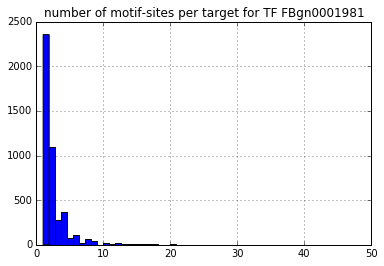

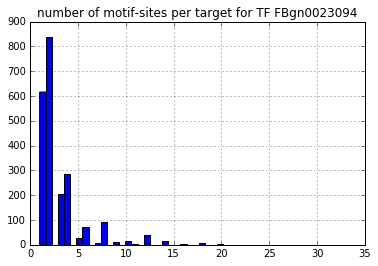

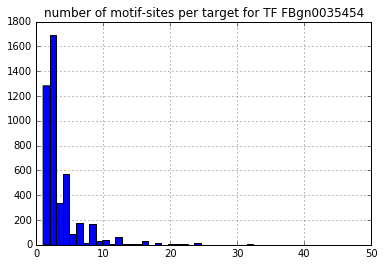

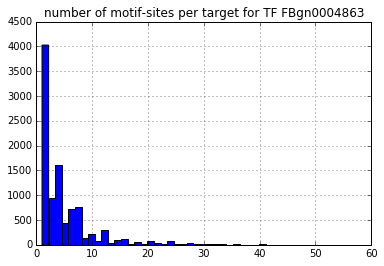

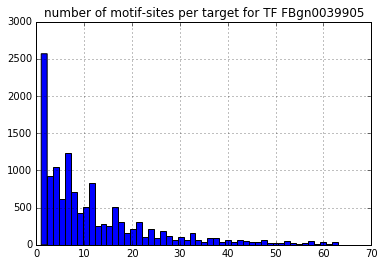

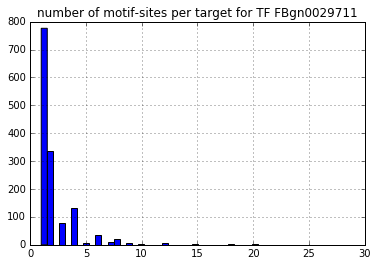

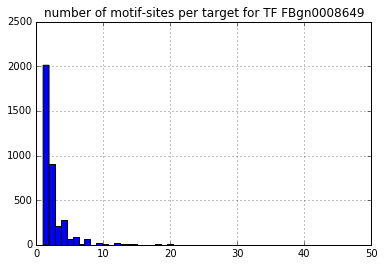

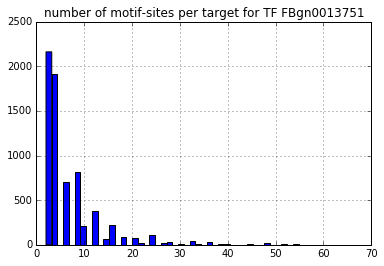

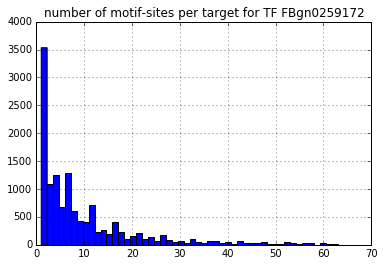

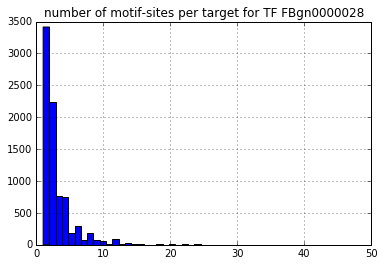

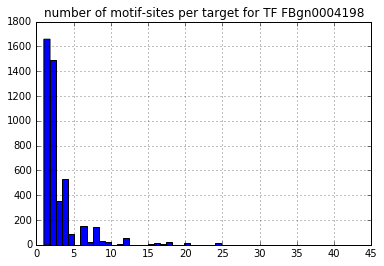

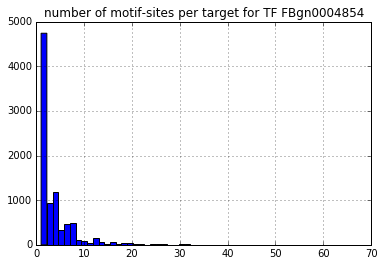

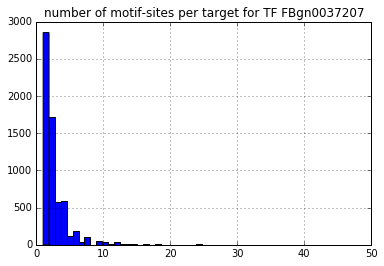

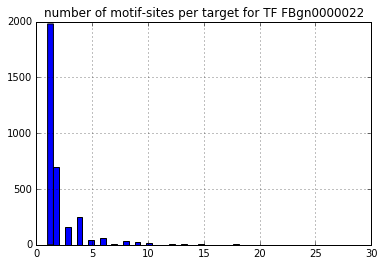

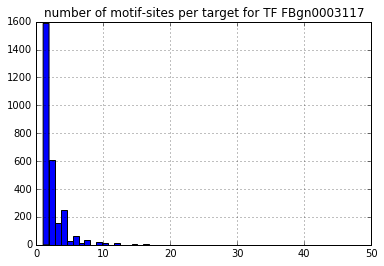

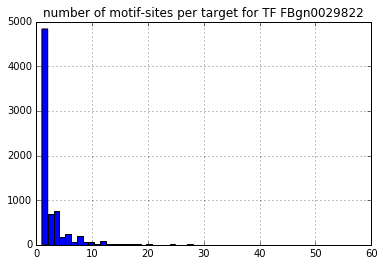

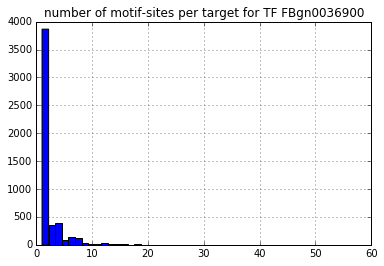

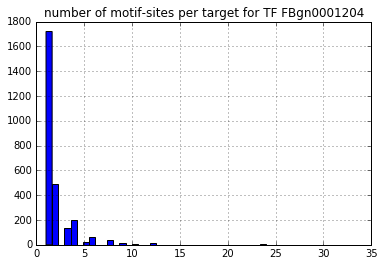

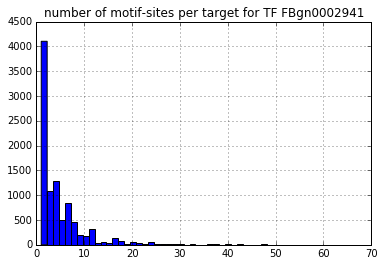

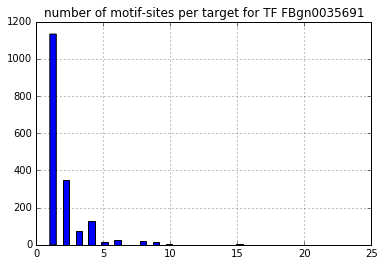

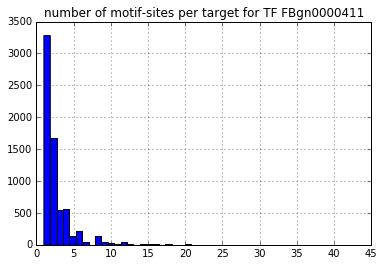

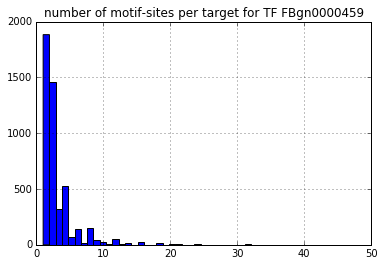

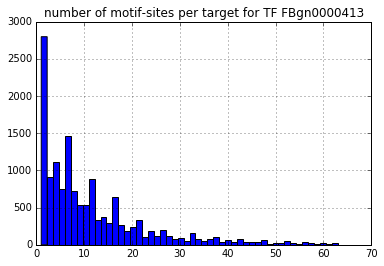

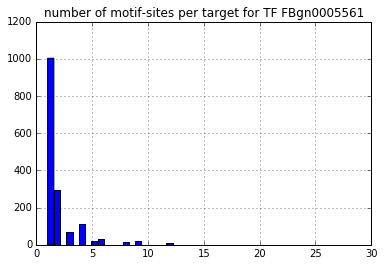

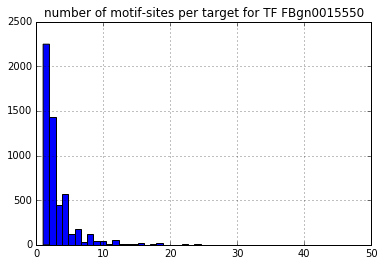

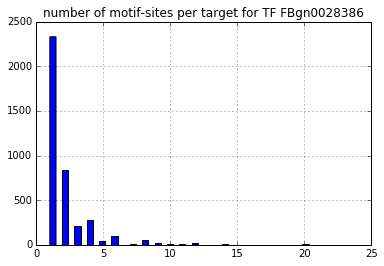

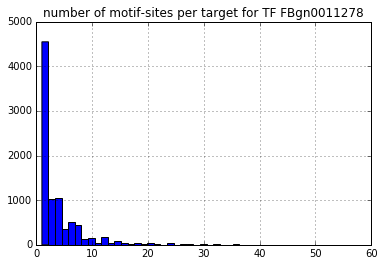

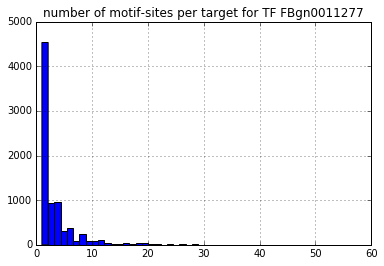

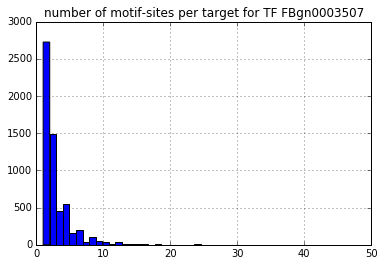

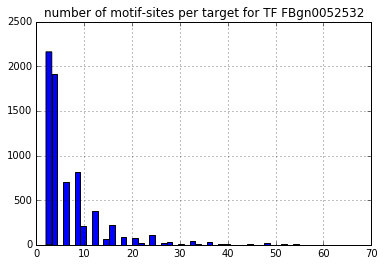

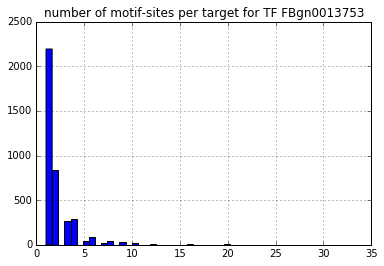

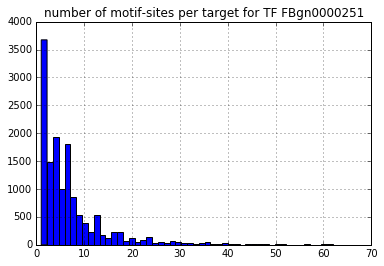

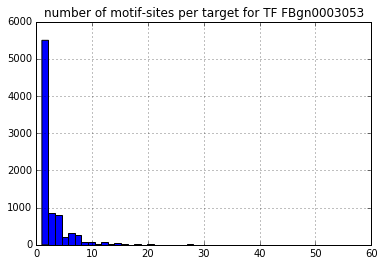

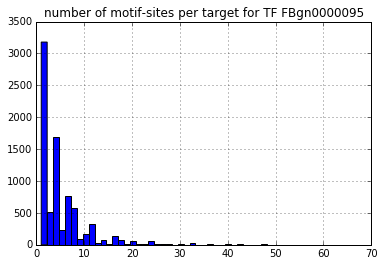

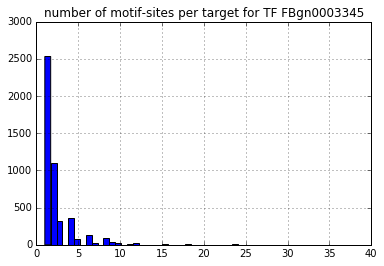

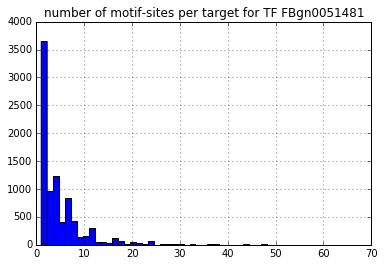

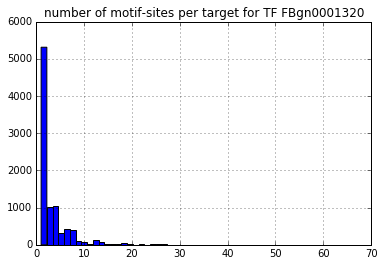

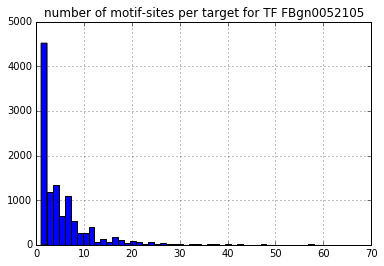

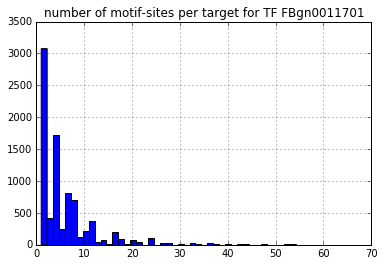

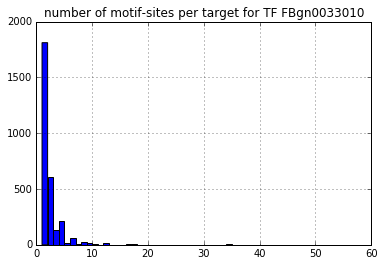

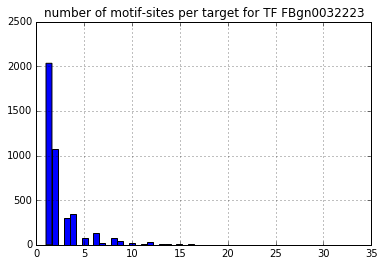

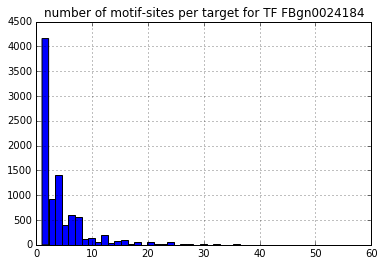

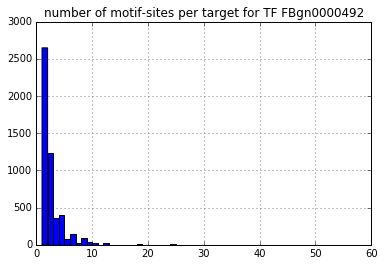

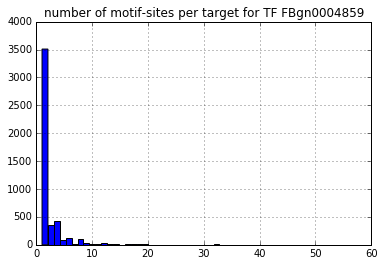

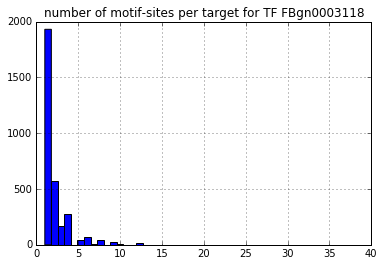

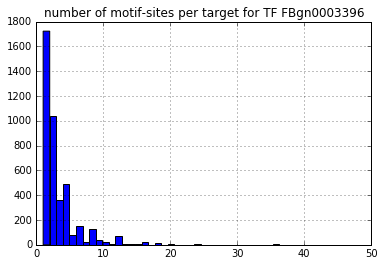

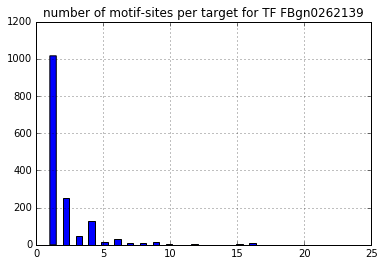

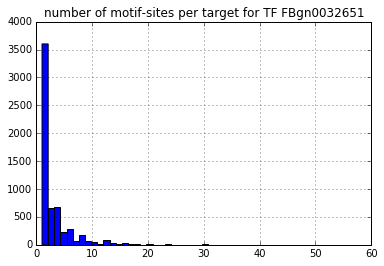

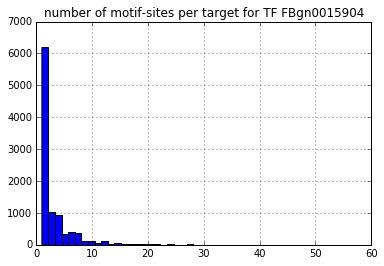

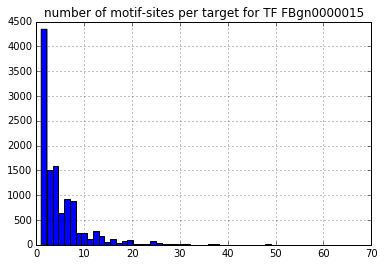

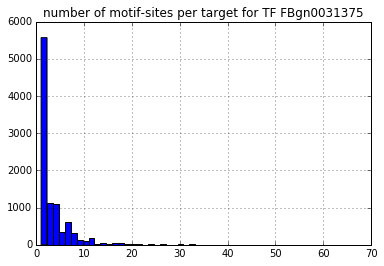

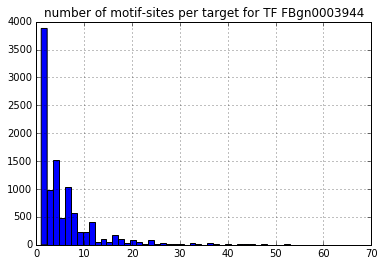

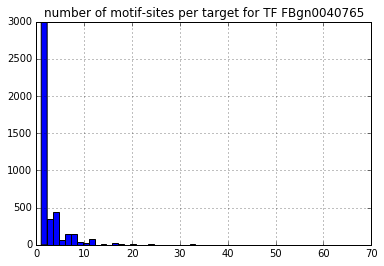

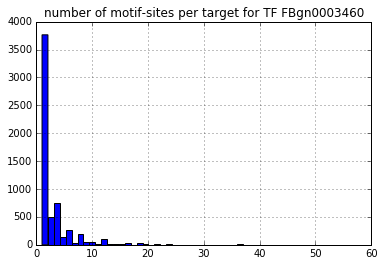

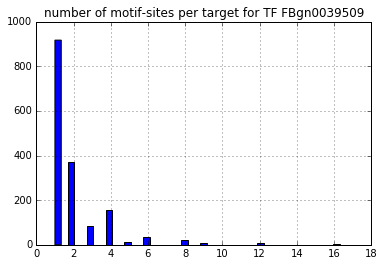

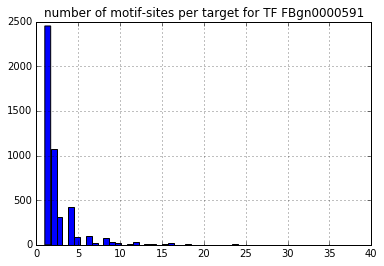

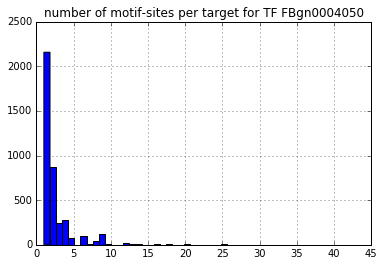

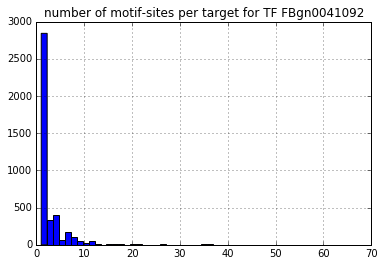

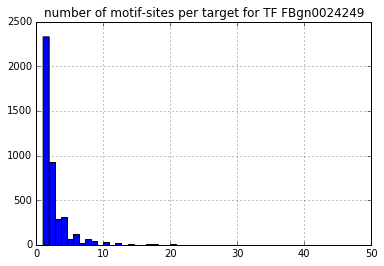

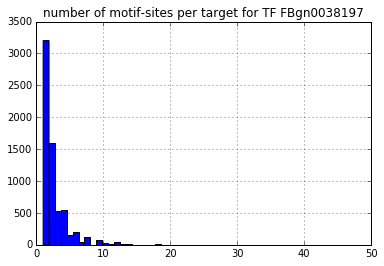

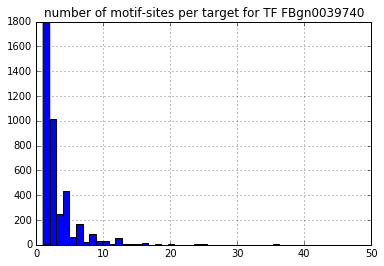

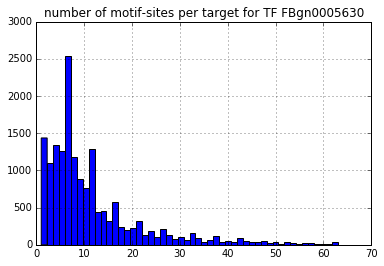

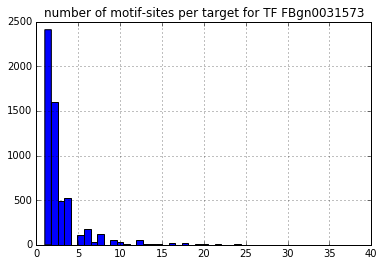

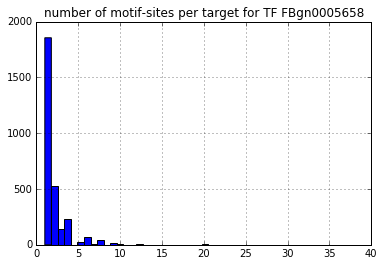

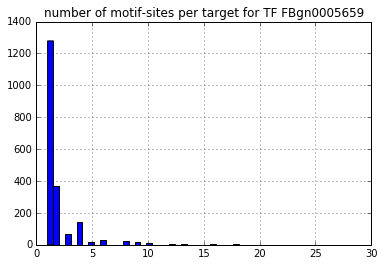

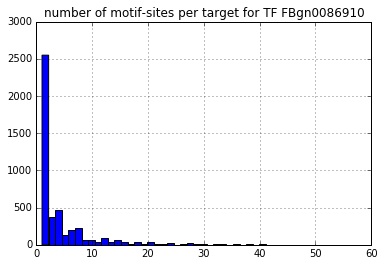

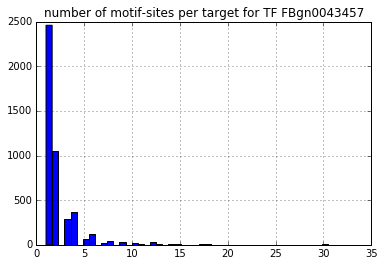

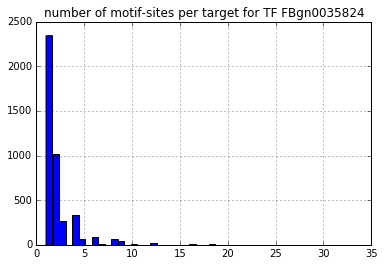

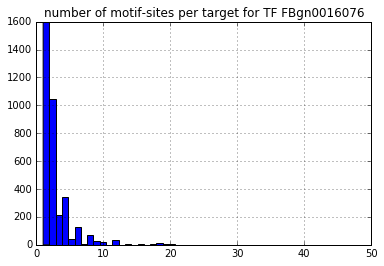

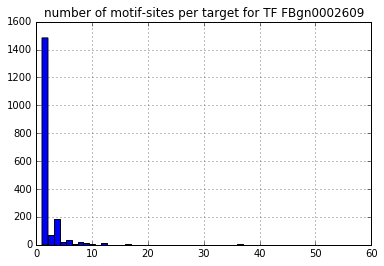

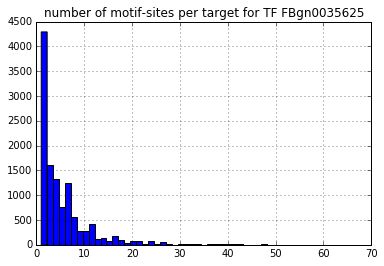

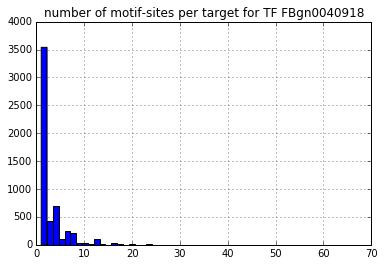

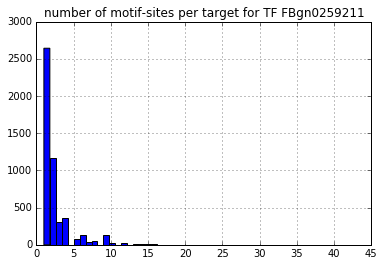

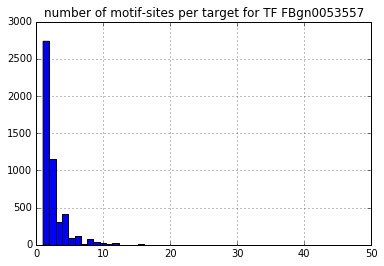

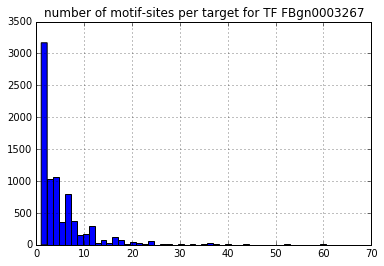

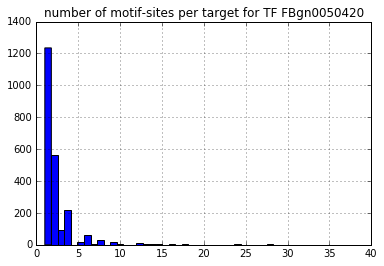

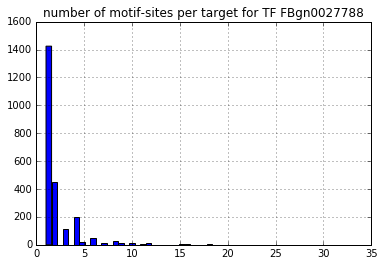

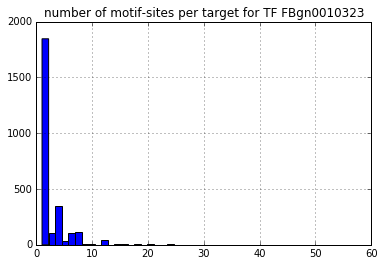

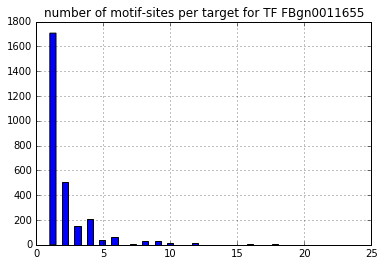

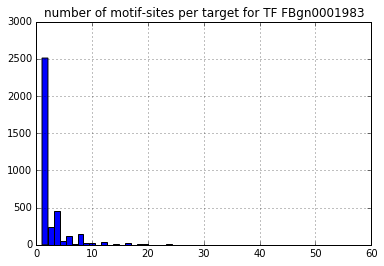

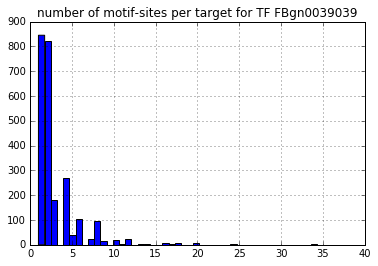

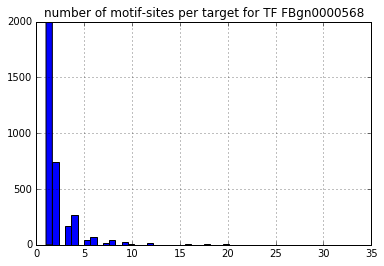

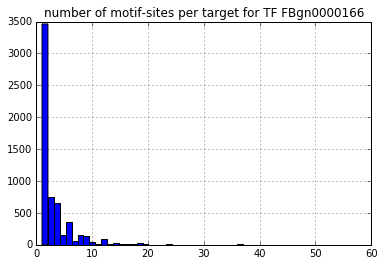

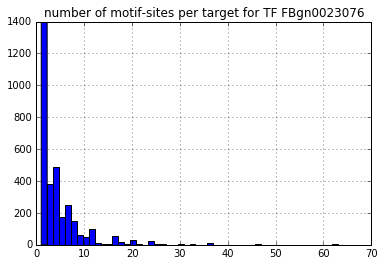

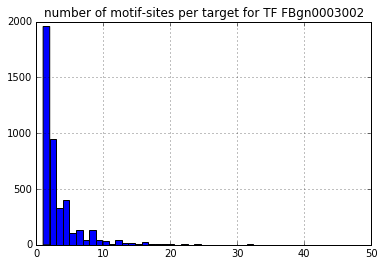

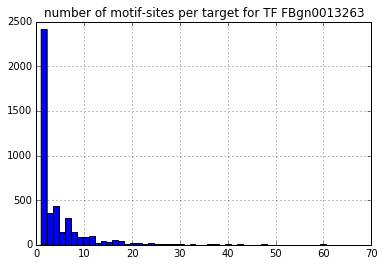

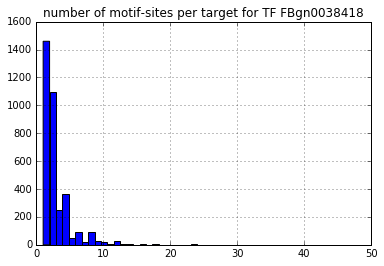

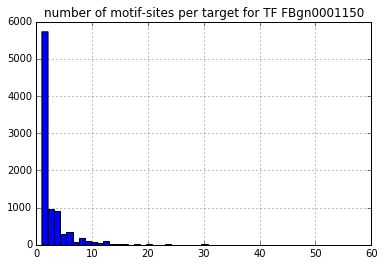

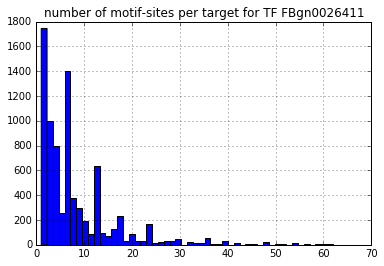

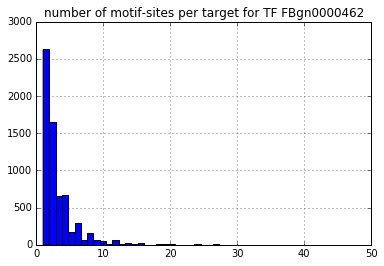

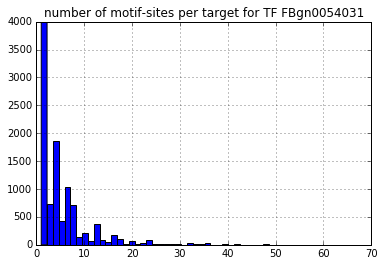

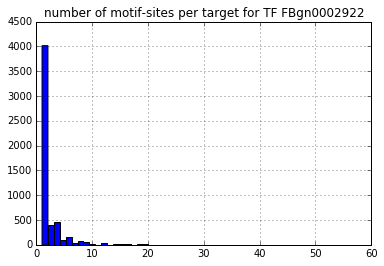

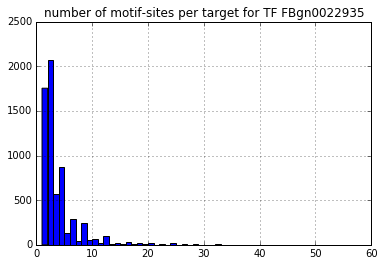

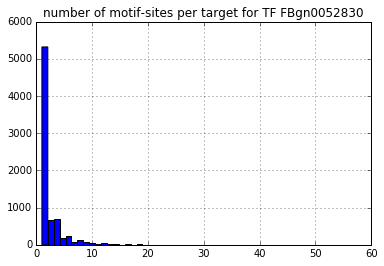

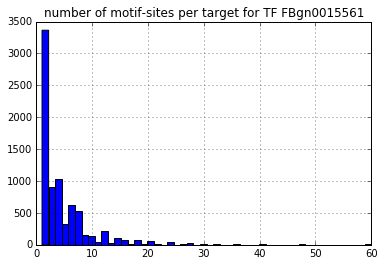

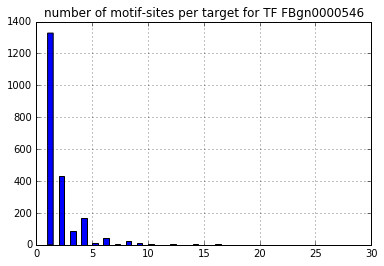

In [34]:
medians = {}
maxs = {}
mins = {}
plt.figure(figsize=(10,10))
for tf in priors.columns:
    nonzero_dat = priors[tf][priors[tf] > 0]
    medians[tf] = nonzero_dat.median()
    maxs[tf] = nonzero_dat.max()
    mins[tf] = nonzero_dat.min()
    plt.title('number of motif-sites per target for TF {}'.format(tf))
    nonzero_dat.hist(bins=50)
    plt.show()

(array([  4.,   2.,   1.,   0.,  15.,   2.,   7.,   1.,  11.,  10.,  11.,
          1.,   9.,   3.,  15.,   7.,   8.,   3.,  20.,   0.,  16.,  11.,
         12.,   2.,  18.,   9.,   8.,   5.,  39.,  73.]),
 array([ 18. ,  19.5,  21. ,  22.5,  24. ,  25.5,  27. ,  28.5,  30. ,
         31.5,  33. ,  34.5,  36. ,  37.5,  39. ,  40.5,  42. ,  43.5,
         45. ,  46.5,  48. ,  49.5,  51. ,  52.5,  54. ,  55.5,  57. ,
         58.5,  60. ,  61.5,  63. ]),
 <a list of 30 Patch objects>)

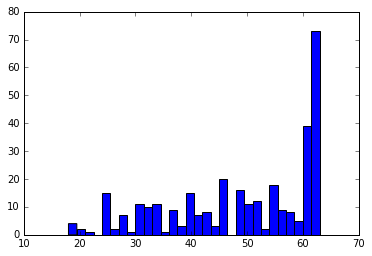

In [38]:
plt.hist(maxs.values(), bins = 30)

## Merge priors

In [3]:
basename = '~/Dev/Drosophila_Inferelator'
fnames = ['3_samples_merged_intersected_with_1kb_tss_priors.tsv', '3_samples_merged_intersected_with_introns_priors.tsv']

In [83]:
priors = [pd.read_csv(os.path.join(basename, f), sep = '\t') for f in fnames]

In [84]:
priors[0].shape

(4804, 328)

In [114]:
priors[0].tail()

FBgn0015239  FBgn0086680  FBgn0004396  FBgn0004652  FBgn0004394  \
FBgn0010651            0            1            1            0            0   
FBgn0030364            0            0            0            3            0   
FBgn0051159            0            0            0            1            0   
FBgn0030362            0            0            0            1            0   
FBgn0036804            0            4            1            0            2   

             FBgn0001147  FBgn0004837  FBgn0011723  FBgn0000576  FBgn0010433  \
FBgn0010651            0            0            0            0            9   
FBgn0030364            0            0            0            0            0   
FBgn0051159            0            0            0            0            0   
FBgn0030362            0            1            2            3            2   
FBgn0036804            2            1            2            0            7   

                ...       FBgn0000462  FBgn0000459  FBgn0001983  FBgn0054031  \
FBgn0010651     ...                 0            0            2            0   
FBgn0030364     ...                 0            3            1            0   
FBgn0051159     ...                 1            2            0            0   
FBgn0030362     ...                 0            1            1            0   
FBgn0036804     ...                 0            0            2            0   

             FBgn0031573  FBgn0003145  FBgn0000014  FBgn0000659  FBgn0015561  \
FBgn0010651            4            0            0            0            0   
FBgn0030364            0            1            0            0            0   
FBgn0051159            1            2            0            0            0   
FBgn0030362            0            0            2            2            3   
FBgn0036804            1            2            0            1            0   

             FBgn0000546  
FBgn0010651            0  
FBgn0030364            0  
FBgn0051159            0  
FBgn0030362            0  
FBgn0036804            0  

[5 rows x 328 columns]

In [47]:
priors[0].columns == priors[1].columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [93]:
total_rows = set(priors[1].index).union(set(priors[0].index))
expanded_dfs = []
for prior in priors:
    new_index = total_rows - set(prior.index)
    new_pd = pd.DataFrame(np.zeros((len(new_index), prior.shape[1])), index=new_index, columns=prior.columns)
    expanded_dfs.append(prior.append(new_pd))

In [105]:
final_prior = expanded_dfs[0].add(expanded_dfs[1])

In [119]:
final_prior.index

Index([u'FBgn0000003', u'FBgn0000008', u'FBgn0000015', u'FBgn0000017',
       u'FBgn0000018', u'FBgn0000024', u'FBgn0000042', u'FBgn0000043',
       u'FBgn0000044', u'FBgn0000046',
       ...
       u'FBgn0284435', u'FBgn0284436', u'FBgn0285879', u'FBgn0285913',
       u'FBgn0285917', u'FBgn0285925', u'FBgn0285926', u'FBgn0285937',
       u'FBgn0285955', u'FBgn0285958'],
      dtype='object', length=5936)

In [104]:
set(expanded_dfs[0].index) == set(expanded_dfs[1].index)

True

In [109]:
set(expanded_dfs[0].index) == set(final_prior.index)

True

In [118]:
# ToDo: figure out why prior has NAN index
final_prior.drop(np.nan, inplace=True)

ValueError: labels [ nan] not contained in axis

In [121]:
final_prior[ final_prior != 0] = 1

In [69]:
len(shared_rows)

1769

In [122]:
final_prior.head()

FBgn0015239  FBgn0086680  FBgn0004396  FBgn0004652  FBgn0004394  \
FBgn0000003          1.0          0.0          0.0          1.0          0.0   
FBgn0000008          1.0          1.0          0.0          1.0          1.0   
FBgn0000015          1.0          0.0          0.0          1.0          0.0   
FBgn0000017          1.0          1.0          0.0          1.0          1.0   
FBgn0000018          1.0          1.0          1.0          1.0          0.0   

             FBgn0001147  FBgn0004837  FBgn0011723  FBgn0000576  FBgn0010433  \
FBgn0000003          1.0          0.0          0.0          1.0          1.0   
FBgn0000008          0.0          0.0          0.0          1.0          1.0   
FBgn0000015          1.0          0.0          1.0          0.0          1.0   
FBgn0000017          0.0          1.0          1.0          1.0          1.0   
FBgn0000018          0.0          1.0          1.0          1.0          1.0   

                ...       FBgn0000462  FBgn0000459  FBgn0001983  FBgn0054031  \
FBgn0000003     ...               1.0          1.0          1.0          0.0   
FBgn0000008     ...               1.0          1.0          1.0          0.0   
FBgn0000015     ...               1.0          1.0          1.0          0.0   
FBgn0000017     ...               1.0          1.0          1.0          1.0   
FBgn0000018     ...               1.0          1.0          1.0          1.0   

             FBgn0031573  FBgn0003145  FBgn0000014  FBgn0000659  FBgn0015561  \
FBgn0000003          1.0          1.0          0.0          0.0          0.0   
FBgn0000008          0.0          1.0          1.0          0.0          1.0   
FBgn0000015          0.0          1.0          0.0          0.0          0.0   
FBgn0000017          1.0          1.0          1.0          1.0          1.0   
FBgn0000018          1.0          1.0          1.0          0.0          0.0   

             FBgn0000546  
FBgn0000003          0.0  
FBgn0000008          0.0  
FBgn0000015          1.0  
FBgn0000017          0.0  
FBgn0000018          1.0  

[5 rows x 328 columns]

In [123]:
final_prior.to_csv(os.path.join(basename, 'gold_standard.tsv'), sep='\t')

In [129]:
final_prior.columns

Index([u'FBgn0015239', u'FBgn0086680', u'FBgn0004396', u'FBgn0004652',
       u'FBgn0004394', u'FBgn0001147', u'FBgn0004837', u'FBgn0011723',
       u'FBgn0000576', u'FBgn0010433',
       ...
       u'FBgn0000462', u'FBgn0000459', u'FBgn0001983', u'FBgn0054031',
       u'FBgn0031573', u'FBgn0003145', u'FBgn0000014', u'FBgn0000659',
       u'FBgn0015561', u'FBgn0000546'],
      dtype='object', length=328)